# Including Spin-Dependent Operators and the Trees Effective Operator

Thus far spin has only been included in a rather ad-hoc way, but at this point it is necessary to modify a few things to include it more fundamentally.

First, Qets will now have quantum symbols that are represented as the new class `SpinOrbital`.

Second, hamiltonian_CF_CR now includes LS coupling between the states providing an additional parameter $\zeta_{SO}$.

In doing this it was also deemed useful to add some function to provide matrices for angular momenta, for this two functions were added to `qdef.py`: `Jmatrices`, and `LSmatrix`.

In addition to this, this notebook also includes the development code for adding the Trees effective operator to the total hamiltonian.

At this point the hamiltonian that includes Coulomb repulsion, Trees' effective operator, spin-orbit, and crystal field has been renamed `hamiltonian_CF_CR_SO_TO`

In [1]:
%load_ext line_profiler
%load_ext autoreload
# provide cell timings
%load_ext autotime
%autoreload 2
import sympy as sp
import numpy as np
%config InlineBackend.figure_format='retina'
%config Completer.use_jedi = False
from qdef import *
from misc import *
from matrixgoodies import *
from IPython.display import display, Math, Latex, HTML
from itertools import product, permutations
plt.style.use('dark_background')

Reloading /Users/juan/Zia Lab/Codebase/qdef/data/CPGs.pkl ...


A SpinOrbital needs to be initialized with a symbol for the orbital part and the proyection of spin onto the z-axis.

In [2]:
Qet({SpinOrbital(sp.Symbol('\\zeta'), S_UP): 1/sp.sqrt(2),
    SpinOrbital(sp.Symbol('\\beta'), S_DOWN): 1/sp.sqrt(2)})

Qet({\zeta↑: sqrt(2)/2, \beta↓: sqrt(2)/2})

Here are the matrices that represent the hamiltonian with crystal field, electrostatic repulsion, ans spin orbit for one electron. Both in the standard basis, and in the crystal basis.

In [3]:
# crystal basis
crystal_ham = hamiltonian_CF_CR_SO_TO(1, 'O', 2, False, False)[0]
# standard basis
standard_ham = hamiltonian_CF_CR_SO_TO(1, 'O', 2, False, True)[0]

Using crystal field basis.
Using spherical harmonics basis.


In [4]:
# here's just the spin-orbit contribution
# verifying that the eigenvalues are correct in both cases 
subs = {k:0 for k in list(standard_ham.free_symbols)}
del subs[sp.Symbol('\\zeta_{SO}')]
just_SO = standard_ham.subs(subs)
display(just_SO)
print(just_SO.eigenvals())
subs = {k:0 for k in list(crystal_ham.free_symbols)}
del subs[sp.Symbol('\\zeta_{SO}')]
just_SO = crystal_ham.subs(subs)
display(just_SO)
print(just_SO.eigenvals())

Matrix([
[\zeta_{SO},            0,                    0,                    0,           0,           0,                    0,                    0,            0,          0],
[         0, \zeta_{SO}/2,                    0,                    0,           0,  \zeta_{SO},                    0,                    0,            0,          0],
[         0,            0,                    0,                    0,           0,           0, sqrt(6)*\zeta_{SO}/2,                    0,            0,          0],
[         0,            0,                    0,        -\zeta_{SO}/2,           0,           0,                    0, sqrt(6)*\zeta_{SO}/2,            0,          0],
[         0,            0,                    0,                    0, -\zeta_{SO},           0,                    0,                    0,   \zeta_{SO},          0],
[         0,   \zeta_{SO},                    0,                    0,           0, -\zeta_{SO},                    0,                    0,           

{\zeta_{SO}: 6, -3*\zeta_{SO}/2: 4}


Matrix([
[         \zeta_{SO}/2,                    0,                    0,                    0,                    0, -sqrt(2)*\zeta_{SO}/2,                    0,                    0,                    0, sqrt(2)*\zeta_{SO}/2],
[                    0,        -\zeta_{SO}/2,                    0,                    0,                    0,                     0, sqrt(6)*\zeta_{SO}/2,                    0,                    0,                    0],
[                    0,                    0,        -\zeta_{SO}/2,                    0,                    0,                     0,                    0, sqrt(6)*\zeta_{SO}/2,                    0,                    0],
[                    0,                    0,                    0,         \zeta_{SO}/2, sqrt(2)*\zeta_{SO}/2,                     0,                    0,                    0, sqrt(2)*\zeta_{SO}/2,                    0],
[                    0,                    0,                    0, sqrt(2)*\zeta_{SO}/2,      

{-3*\zeta_{SO}/2: 4, \zeta_{SO}: 6}


In [5]:
# as an additional check let's see what is the spectrum
# of the spin-orbit operator for two electrons
# crystal basis
crystal_ham = hamiltonian_CF_CR_SO_TO(2, 'O', 2, False, False)[0]
# standard basis
standard_ham = hamiltonian_CF_CR_SO_TO(2, 'O', 2, False, True)[0]

Using crystal field basis.
Using spherical harmonics basis.


Here's below is just the spin-orbit contribution verifying that the eigenvalues are correct and equal in both bases.

In [12]:
subs = {k:0 for k in list(standard_ham.free_symbols)}
subs[sp.Symbol('\\zeta_{SO}')] = 1
just_SO = standard_ham.subs(subs)
# display(just_SO)
print(just_SO.eigenvals())
subs = {k:0 for k in list(crystal_ham.free_symbols)}
subs[sp.Symbol('\\zeta_{SO}')] = 1
just_SO = crystal_ham.subs(subs)
# display(just_SO)
print(just_SO.eigenvals())

{2: 15, -1/2: 24, -3: 6}
{-3: 6, 2: 15, -1/2: 24}


Here's the Tree's operator, in the standard and crystal-field bases.

In [16]:
# in the standard basis
ham = hamiltonian_CF_CR_SO_TO(2, 'O', 2, False, True)[0]
subs = {k:0 for k in list(ham.free_symbols)}
del subs[sp.Symbol('\\alpha_T')]
only_Trees = ham.subs(subs)
print(only_Trees.eigenvals())
display(only_Trees)

# in the crystal-field basis
ham = hamiltonian_CF_CR_SO_TO(2, 'O', 2, False, False)[0]
subs = {k:0 for k in list(ham.free_symbols)}
del subs[sp.Symbol('\\alpha_T')]
only_Trees = ham.subs(subs)
print(only_Trees.eigenvals())
display(only_Trees)

{12*\alpha_T: 21, 2*\alpha_T: 9, 20*\alpha_T: 9, 6*\alpha_T: 5, 0: 1}


Matrix([
[12*\alpha_T,           0,                  0,          0,           0,           0,                  0,                  0,          0,                  0,           0,                  0,           0,                  0,                  0,           0,                  0,                  0,           0,                  0,                  0,           0,                  0,                  0,           0,                  0,           0,                  0,                  0,           0,          0,                  0,                  0,           0,           0,           0,           0,                  0,          0,                  0,           0,                  0,                  0,           0,           0],
[          0, 12*\alpha_T,                  0,          0,           0,           0,                  0,                  0,          0,                  0,           0,                  0,           0,                  0,                  0,           0

{20*\alpha_T: 9, 12*\alpha_T: 21, 6*\alpha_T: 5, 2*\alpha_T: 9, 0: 1}


Matrix([
[        14*\alpha_T,           0,           0,                   0,                   0,                   0,                   0,                   0,                   0,           0,           0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                  0,                  0,                   0,                   0,                   0,                   0,                  0,                  0,                   0,                   0,                   0,                   0,           0,           0, -2*sqrt(3)*\alpha_T,           0,           0,  2*sqrt(3)*\alpha_T,           0,           0,           0,           0,           0, 2*sqrt(3)*\alpha_T, -2*sqrt(3)*\alpha_T,           0,           0],
[                  0, 10*\alpha_T,           0,                   0,                   0,                   0,                   0,                   0,                 

# Trees Operator -- development code

In [ ]:
class AngularMomentum():
    '''
    Angular momentum and all its wonders.
    '''
    remembered_additions = {}
    @classmethod
    def add(cls, ls):
        '''
        Given  an  iterable  of  angular  momenta  to  add  up, this
        function    determines   states   which   are   simultaneous
        eigenvectors  of  L_total^2,  and  L_total_z. In addition to
        these  two the resulting kets also preserve the "trajectory"
        taken  to arrive to them, in the sense that the intermediate
        L_total  are  also  kept: these can be used to differentiate
        the  several  ways in which a particular ket (eigenvector of
        L_total^2  and  L_total_)  can  be  arrived at. Furthermore,
        these  additional  steps    (labeled L123...m) also stand in
        for eigenvalues of L123....m_total^2.

        Parameters
        ----------
        ls  : (iterable)
            an   iterable   consisting   of  n  non-negative
            integers or half-integers.

        Returns
        -------
        {
         'kets' : (OrderedDict)
                keys  are (mL123..n, L123..n, L123...(n-1), ... L12)
                and  values  are  qets  whose  keys are (ml_1, ml_2,
                ml_3, ... , ml_n) tuples}
         'uncoupled_basis' : (list)
                values are tuples of all the (ml_1, ml_2, ..., ml_n)
                combos
        }
        '''
        assert all(map(lambda x: x >= 0, ls))
        ls = tuple(half_integer_fixer(ls))
        if len(ls) == 1:
            ls = ls[0]
            root_kets = OrderedDict([((mls,ls), Qet({(mls,):1})) \
                                         for mls in mrange(ls)])
            return {'kets': root_kets,
                    'uncoupled_basis': [(mls,) for mls in mrange(ls)]}
        uncoupled_basis = list(product(*[mrange(l) for l in ls]))
        print("Basis will include %d kets." % len(uncoupled_basis))
        if ls in cls.remembered_additions.keys():
            return cls.remembered_additions[ls]
        ls_original = tuple(ls)
        # if there are more than two to add, take the last one "l_next"
        # and collect the other ones "ls". This is done recursively
        # until "ls" contains only two values of l to add, at which
        # point the the root_kets are simply the states of the first
        # ls
        if len(ls) > 2:
            ls, l_next = ls[:-1], ls[-1]
            print("Coupling %s to %s" % (str(ls), str(l_next)))
            l_root = cls.add(ls)
        else:
            # when there's only two the root_kets are simply
            # the kets of ls[0]
            ls, l_next = ls[0], ls[1]
            print("Coupling %s to %s" % (str(ls), str(l_next)))
            root_kets = OrderedDict([((mls,ls), Qet({(mls,):1})) \
                                         for mls in mrange(ls)])
            l_root = {'kets': root_kets}
        ml_nexts = mrange(l_next)
        kets = l_root['kets']
        summands = {}
        # doing the sum over the keys of the included kets
        # simplifies an iterator that would otherwise be
        # more complex
        # to take the adequate sum, the terms that correspond
        # to each sum are collected in the keys of the dictionary
        # summands
        # they keys of kets are tuples such that the first element
        # is the value mL at that stage, L12...n is the second,
        # L12...(n-1) the third, ....
        for ketroot_nums, ketroot in kets.items():
            l_stems = lrange(ketroot_nums[1], l_next)
            for l_stem in l_stems:
                ml_stems = mrange(l_stem)
                for ml_next, ml_stem in product(ml_nexts, ml_stems):
                    c = cg.eva(ketroot_nums[1], l_next, l_stem, \
                               ketroot_nums[0], ml_next, ml_stem)
                    if c == 0:
                        continue
                    combo = (ml_stem, l_stem, *ketroot_nums[1:])
                    if combo not in summands.keys():
                        summands[combo] = []
                    summands[combo].append(ketroot * Qet({(ml_next,): c}))
        coupled_kets = OrderedDict()
        # add up all the summands enclosed in each list as
        # keyed by each tuple (ml_stem, l_stem, ...)
        for k, v in summands.items():
            coupled_kets[k] = sum(v, Qet({}))
        ordered_keys = sorted(coupled_kets.keys())
        # order the keys of the coupled_kets
        coupled_kets_ordered = OrderedDict([(k,coupled_kets[k]) \
                                            for k in ordered_keys])
        assert len(coupled_kets) == len(uncoupled_basis), \
                        '%d %d' % (len(coupled_kets), len(uncoupled_basis))
        cls.remembered_additions[ls_original] = {'kets': coupled_kets_ordered,
                            'uncoupled_basis': uncoupled_basis}
        return {'kets': coupled_kets_ordered,
                'uncoupled_basis': uncoupled_basis}
    @classmethod
    def clear_add_cache(cls):
        cls.remembered_additions = {}


def half_integer_fixer(nums):
    return [sp.S(int(num*2))/2 for num in nums]

class cg():
    remember = {}

    @classmethod
    def eva(cls, *args):
        if args in cls.remember.keys():
            return cls.remember[args]
        else:
            acg = clebsch_gordan(*args)
            cls.remember[args] = acg
            return acg

In [ ]:
def trees_dict(l, return_matrix = False):
    '''
    This  function  returns the matrix elements of the l_1⋅l_2 operator in
    the standard basis for two electrons.

    This  can  be  used to evaluate the two-body contribution of the Trees
    effective operator.

    The  keys are given in the format (m1, m2, m1p, m2p) so that the given
    value    in    the    dictionary    equals    the    matrix    element
    <m1,m2|l_1⋅l_2|m1p,m2p>.
    '''
    if l in trees_dict.values:
        return trees_dict.values[l]
    jmats = Jmatrices(l, high_to_low=False)
    trees_mat = 2*sum([TensorProduct(mat1,mat1) for mat1 in jmats], sp.zeros((2*l+1)**2))
    if return_matrix:
        return trees_mat
    mbasis = mrange(l)
    trees_dictionaire = OrderedDict()
    tensor_basis = list(product(mbasis, mbasis))
    for rowidx in range(trees_mat.rows):
        row_thing = tensor_basis[rowidx]
        for colidx in range(trees_mat.cols):
            col_thing = tensor_basis[colidx]
            val = trees_mat[rowidx, colidx]
            if val !=0:
                trees_dictionaire[tuple(row_thing + col_thing)] = val
    trees_dict.values[l] = trees_dictionaire
    return trees_dictionaire
trees_dict.values = {}

def hamiltonian_CF_CR_SO_TO(num_electrons, group_label, l, sparse=False, force_standard_basis=False):
    '''
    Given  a  crystal field on an an ion with a given number of electrons,
    this  function  provides  the  matrix that represents the hamiltionian
    that includes:

    1) the crystal field term of the given symmetry (one-body),
    2) the Coulomb repulsion between electrons (two-body),
    3) the spin-orbit interaction (one-body),
    4) and the Trees effective operator α_T L(L+1) (two-body + one-body).

    The symbols associated with each term are:

    - crystal field: B_{i,j}
    - coulomb repulsion: F^{(k)}
    - spin-orbit interacion: \zeta_{SO}
    - Trees operator: \alpha_T

    The  contribution  to the total energy, as provided by the interaction
    with  the  nuclear  charge  does  not  figure  here, because it merely
    provides  a  constant  shift to all the energy levels included in this
    description.

    In  all  cases  the  basis  used  in this matrix representation of the
    Hamiltonian  is  composed  of  slater  determinants of single-electron
    states.  If  force_standard_basis=True  then the angular part of these
    states    is    given    by    standard    spherical    harmonic    if
    force_standard_basis=False  then  the single-electron states are taken
    as  the  eigenvectors of the single-electron crystal field. In forming
    these slater determinants spin=1/2 is assumed.

    The  Coulomb  repulsion appears as Slater integrals of several orders,
    and  the  crystal  field  contribution as a function of the parameters
    that parametrize it according to the corresponding symmetry group.

    If  the crystal field for a single electron is possible to diagonalize
    symbolically, then the basis used for the hamiltonian is an eigenbasis
    for  it, if not, then the single-electron basis is simply the full set
    of spherical harmonics for the given value of l  (multiplied by radial
    parts that figure as the parameters of the model hamiltonian).

    The  two-electron  and  one-electron operators are evaluated using the
    Slater-Condon rules.

    The  resulting  matrix is square with size d X d with d = sp.binomial(
    2*2*l(+1),  num_electrons), which equals how many spin orbitals can be
    assigned to the given number of electrons.

    Parameters
    ----------

    num_electrons (int): how many electrons are there included.

    group_label   (str): label for one of the 32

    l             (int): angular momentum of pressumed ground state

    sparse (Bool): if True then the returned matrix is sp.SparseMatrix

    force_standard_basis  (Bool):  whether  to  force  use of the standard
    spherical  harmonic basis, instead of allowing for the eigenvectors of
    the crystal field to be used.

    Returns
    ------

    hamiltonian  (sp.SparseMatrix): in terms of Slater integrals F^{k} (or
    Racah  parameters  if  to_Racah  is  provided)  and  the crystal field
    parameters adequate to the group.

    basis_change  (OrderedDict): the keys being the labels used internally
    for   calculations   and   the   values   being   Qets  understood  as
    superpositions of spherical harmonics. This for  the  single  electron
    states which are used to create multi-electron states.

    slater_dets  (list):  a  list  of  symbols  that represents the slater
    determinants  used for the basis in which the hamiltonian is computed,
    in  here  a  symbol with a bar on top is understood to have spin down,
    and  one  without  to have spin up (m=1/2). Together with basis_change
    this could be used to generate the multi-electron determinantal states
    in terms of slater determinants of spherical harmonics.

    '''

    uID = (num_electrons, group_label, l, sparse, force_standard_basis)

    if uID in hamiltonian_CF_CR.remembered:
        return hamiltonian_CF_CR.remembered[uID]

    LS_dict = LSmatrix(l, S_HALF, high_to_low=True, as_dict=True)

    group_index = CPGs.all_group_labels.index(group_label) + 1

    cf_field = crystal_splits[group_index]
    crystal_basis = (len(cf_field['eigen_system']) > 0)
    trees_dictionaire = trees_dict(l)
    
    if crystal_basis:
        eigen_sys = cf_field['eigen_system'][0]

    if crystal_basis and not force_standard_basis:
        print("Using crystal field basis.")
        basis_change = OrderedDict()
        eigen_counter = 0
        basis_energies = {}
        for eigen_part in eigen_sys:
            eigen_energy = eigen_part[0]
            for eigen_vec in eigen_part[2]:
                for spin in [S_UP, S_DOWN]:
                    eigen_label = SpinOrbital(sp.Symbol('\\alpha_{%d}' % (eigen_counter)), spin)
                    spherical_combo = Qet({(l,m,spin): v for m,v in zip(range(l,-l-1,-1),list(eigen_vec.T)) if v!= 0})
                    normalizer = sp.S(1)/spherical_combo.norm()
                    basis_change[eigen_label] = normalizer*spherical_combo
                    basis_energies[eigen_label] = eigen_energy
                eigen_counter += 1
        single_e_basis = list(basis_change.keys())

        def crystal_energy(qnums, coeff):
            the_dict = {1:0}
            γ1, γ2 = qnums
            if γ1.spin != γ2.spin:
                return {}
            else:
                if γ1.orbital == γ2.orbital:
                    the_dict[1] = coeff * basis_energies[γ1]
                if the_dict[1] == 0:
                    return {}
                else:
                    return the_dict
        
        def spin_energy(qnums, coeff):
            the_dict = {1:0}
            l1, m1, s1, l2, m2, s2 = qnums
            the_dict[1] += coeff * sp.Symbol('\\zeta_{SO}') * LS_dict[((m1,s1), (m2,s2))]
            if the_dict[1] == 0:
                return {}
            else:
                return the_dict

        def trees_op_two_bod(qnums, coeff):
            '''
            This function will take a set of qnums that are assumed to be l1, m1, l2, m2, l1p, m1p, l2p, m2p
            and will return a set of qnums that correspond to slater integrals and corresponding coefficients.
            '''
            l1, m1, s1, l2, m2, s2, l1p, m1p, s1p, l2p, m2p, s2p = qnums
            if not(KroneckerDelta(s1,s1p) and KroneckerDelta(s2,s2p)):
                return {}
            else:
                if (m1,m2,m1p,m2p) in trees_dictionaire:
                    return {1: coeff * trees_dictionaire[(m1,m2,m1p,m2p)]}
                else:
                    return {}
        def tree_op_one_bod(qnums, coeff):
            the_dict = {1:0}
            l1, m1, s1, l2, m2, s2 = qnums
            if m1 == m2 and s1 == s2:
                the_dict[1] = coeff * l * (l+1)
            if the_dict[1] == 0:
                return {}
            else:
                return the_dict

    else:
        print("Using spherical harmonics basis.")
        single_e_basis = [SpinOrbital(sp.Symbol('Y_{%d,%d}' % (l,m)), spin) 
                            for spin in [S_DOWN, S_UP] for m in range(-l,l+1)]
        basis_change = OrderedDict([(SpinOrbital(sp.Symbol('Y_{%d,%d}' % (l,m)), spin), Qet({(l,m,spin):1})) 
                            for spin in [S_DOWN, S_UP] for m in range(-l,l+1)])
        ham = cf_field['matrices'][0]

        def crystal_energy(qnums, coeff):
            the_dict = {1:0}
            γ1, γ2 = qnums
            γ1idx = single_e_basis.index(γ1) % ham.rows
            γ2idx = single_e_basis.index(γ2) % ham.rows
            if γ1.spin != γ2.spin:
                return {}
            else:
                the_dict[1] = coeff * ham[γ1idx, γ2idx]
                if the_dict[1] == 0:
                    return {}
                else:
                    return the_dict
        
        def spin_energy(qnums, coeff):
            the_dict = {1:0}
            γ1, γ2 = qnums
            m1 = list(basis_change[γ1].dict.keys())[0][1]
            m2 = list(basis_change[γ2].dict.keys())[0][1]
            s1, s2  = γ1.spin, γ2.spin
            the_dict[1] = coeff * sp.Symbol('\\zeta_{SO}') * LS_dict[((m1,s1),(m2,s2))]
            if the_dict[1] == 0:
                return {}
            else:
                return the_dict
        
        def trees_op_two_bod(qnums, coeff):
            '''
            This function will take a set of qnums that are assumed to be l1, m1, l2, m2, l1p, m1p, l2p, m2p
            and will return a set of qnums that correspond to slater integrals and corresponding coefficients.
            '''
            l1, m1, s1, l2, m2, s2, l1p, m1p, s1p, l2p, m2p, s2p = qnums
            if not(KroneckerDelta(s1,s1p) and KroneckerDelta(s2,s2p)):
                return {}
            else:
                if (m1,m2,m1p,m2p) in trees_dictionaire:
                    return {1: coeff * trees_dictionaire[(m1,m2,m1p,m2p)]}
                else:
                    return {}
        
        def tree_op_one_bod(qnums, coeff):
            the_dict = {1:0}
            γ1, γ2 = qnums
            m1 = list(basis_change[γ1].dict.keys())[0][1]
            m2 = list(basis_change[γ2].dict.keys())[0][1]
            s1, s2  = γ1.spin, γ2.spin
            if m1 == m2 and s1 == s2:
                the_dict[1] = coeff * l * (l+1)
            if the_dict[1] == 0:
                return {}
            else:
                return the_dict
    
    # add spin up and spin down
    single_e_spin_orbitals = single_e_basis
    # create determinantal states
    slater_dets = list(combinations(single_e_spin_orbitals, num_electrons))
    slater_qets = [Qet({k:1}) for k in slater_dets]
    if sparse:
        hamiltonian = {}
    else:
        hamiltonian = []

    for idx0, qet0 in enumerate(slater_qets):
        row = []
        for idx1, qet1 in enumerate(slater_qets):
            # two electron operators
            double_braket = double_electron_braket(qet0, qet1)
            double_braket = double_braket_basis_change(double_braket, basis_change)
            coulomb_matrix_element = double_braket.apply(to_slater_params)
            coulomb_matrix_element = sp.expand(coulomb_matrix_element.as_symbol_sum())
            trees_matrix_element_twobody = sp.Symbol('\\alpha_T')*sp.expand(double_braket.apply(trees_op_two_bod).as_symbol_sum())
            # one electron operators
            single_braket = single_electron_braket(qet0, qet1)
            crystal_field__matrix_element = single_braket.apply(crystal_energy).as_symbol_sum()
            if (crystal_basis and not force_standard_basis):
                single_braket = single_braket_basis_change(single_braket, basis_change)
            trees_matrix_element_onebod = sp.Symbol('\\alpha_T')*single_braket.apply(tree_op_one_bod).as_symbol_sum()
            spinorb_energy_matrix_element = single_braket.apply(spin_energy).as_symbol_sum()
            matrix_element = (coulomb_matrix_element 
                            + trees_matrix_element_twobody
                            + trees_matrix_element_onebod
                            + crystal_field__matrix_element 
                            + spinorb_energy_matrix_element)
            if matrix_element != 0:
                if sparse:
                    hamiltonian[(idx0,idx1)] = (matrix_element)
                else:
                    row.append(matrix_element)
            else:
                if not sparse:
                    row.append(matrix_element)

        if not sparse:
            hamiltonian.append(row)
    
    if sparse:
        hamiltonian = (sp.SparseMatrix(len(slater_qets), len(slater_qets), hamiltonian))
    else:
        hamiltonian = sp.Matrix(hamiltonian)

    hamiltonian_CF_CR.remembered[uID] = (hamiltonian, basis_change, slater_dets)
    return hamiltonian, basis_change, slater_dets
hamiltonian_CF_CR.remembered = {}

In [ ]:
num_electrons = 3
l = 2
ham = hamiltonian_CF_CR(num_electrons, 'O', l, False, True)

Using spherical harmonics basis.


In [ ]:
hammat = ham[0]
subs = {k: 0 for k in hammat.free_symbols}
del subs[sp.Symbol('\\alpha')] 
# del subs[sp.Symbol('\\kappa')] 
subs[sp.Symbol('\\alpha')]  = 1
freeham = hammat.subs(subs)

In [ ]:
freeham.eigenvals()

{12: 42, 2: 18, 30: 22, 20: 18, 6: 20}

In [ ]:
freeham.eigenvals()

{12: 42, 2: 18, 30: 22, 20: 18, 6: 20}

In [ ]:
np.linalg.eigvalsh(np.array(freeham).astype(np.complex64))

array([ 1.9999996,  1.9999996,  1.9999998,  1.9999998,  1.9999998,
        1.9999998,  1.9999999,  1.9999999,  1.9999999,  1.9999999,
        1.9999999,  1.9999999,  1.9999999,  1.9999999,  2.       ,
        2.       ,  2.       ,  2.       ,  5.9999995,  5.9999995,
        6.       ,  6.       ,  6.       ,  6.       ,  6.       ,
        6.       ,  6.       ,  6.       ,  6.       ,  6.       ,
        6.       ,  6.       ,  6.       ,  6.       ,  6.       ,
        6.       ,  6.       ,  6.       , 12.       , 12.       ,
       12.       , 12.       , 12.       , 12.       , 12.       ,
       12.       , 12.       , 12.       , 12.       , 12.       ,
       12.       , 12.       , 12.       , 12.       , 12.       ,
       12.       , 12.       , 12.       , 12.       , 12.       ,
       12.       , 12.       , 12.       , 12.       , 12.       ,
       12.       , 12.       , 12.       , 12.       , 12.       ,
       12.       , 12.       , 12.       , 12.       , 12.    

In [ ]:
set(freeham.eigenvals().keys()) == {j*(j+1) for j in range(0,num_electrons*l+1)}

False

In [ ]:
{j*(j+1) for j in range(0,num_electrons*l+1)}

{0, 2, 6, 12, 20, 30, 42, 56, 72}

In [9]:
# def hamiltonian_CF_CR(num_electrons, group_label, l, sparse=False, force_standard_basis=False):
#     '''
#     Given  a  crystal field on an an ion with a given number of electrons,
#     this  function  provides  the  matrix that represents the hamiltionian
#     that includes the crystal field together with the Coulomb repulsion.

#     This  Hamiltonian only describes how the ground state is split both by
#     the  crystal  field  and by the Coulomb repulsion. The contribution to
#     the  total  energy,  as  provided  by the interaction with the nuclear
#     charge  does  not  figure  here, because it merely provides a constant
#     shift to all the energy levels included in this description.

#     In  all  cases  the  basis  used  in this matrix representation of the
#     Hamiltonian  is  composed  of  slater  determinants of single-electron
#     states.  If  force_standard_basis=True  then the angular part of these
#     states    is    given    by    standard    spherical    harmonic    if
#     force_standard_basis=False  then  the single-electron states are taken
#     as  the  eigenvectors of the single-electron crystal field. In forming
#     these slater determinants spin=1/2 is assumed.

#     The  Coulomb  repulsion appears as Slater integrals of several orders,
#     and  the  crystal  field  contribution as a function of the parameters
#     that parametrize it according to the corresponding symmetry group.

#     If  the crystal field for a single electron is possible to diagonalize
#     symbolically, then the basis used for the hamiltonian is an eigenbasis
#     for  it, if not, then the single-electron basis is simply the full set
#     of spherical harmonics for the given value of l  (multiplied by radial
#     parts that figure as the parameters of the model hamiltonian).

#     Parameters
#     ----------

#     num_electrons (int): how many electrons are there included.

#     group_label   (str): label for one of the 32

#     l             (int): angular momentum of pressumed ground state

#     sparse (Bool): if True then the returned matrix is sp.SparseMatrix

#     force_standard_basis  (Bool):  whether  to  force  use of the standard
#     spherical  harmonic basis, instead of allowing for the eigenvectors of
#     the crystal field to be used.

#     Returns
#     ------

#     hamiltonian  (sp.SparseMatrix): in terms of Slater integrals F^{k} (or
#     Racah  parameters  if  to_Racah  is  provided)  and  the crystal field
#     parameters adequate to the group.

#     basis_change  (OrderedDict): the keys being the labels used internally
#     for   calculations   and   the   values   being   Qets  understood  as
#     superpositions of spherical harmonics. This for  the  single  electron
#     states which are used to create multi-electron states.

#     slater_dets  (list):  a  list  of  symbols  that represents the slater
#     determinants  used for the basis in which the hamiltonian is computed,
#     in  here  a  symbol with a bar on top is understood to have spin down,
#     and  one  without  to have spin up (m=1/2). Together with basis_change
#     this could be used to generate the multi-electron determinantal states
#     in terms of slater determinants of spherical harmonics.

#     '''

#     uID = (num_electrons, group_label, l, sparse, force_standard_basis)

#     if uID in hamiltonian_CF_CR.remembered:
#         return hamiltonian_CF_CR.remembered[uID]

#     LS_dict = LSmatrix(l, S_HALF, high_to_low=True, as_dict=True)

#     group_index = CPGs.all_group_labels.index(group_label) + 1

#     cf_field = crystal_splits[group_index]
#     crystal_basis = (len(cf_field['eigen_system']) > 0)
    
#     if crystal_basis:
#         eigen_sys = cf_field['eigen_system'][0]

#     if crystal_basis and not force_standard_basis:
#         print("Using crystal field basis.")
#         basis_change = OrderedDict()
#         eigen_counter = 0
#         basis_energies = {}
#         for eigen_part in eigen_sys:
#             eigen_energy = eigen_part[0]
#             for eigen_vec in eigen_part[2]:
#                 for spin in [S_UP, S_DOWN]:
#                     eigen_label = SpinOrbital(sp.Symbol('\\alpha_{%d}' % (eigen_counter)), spin)
#                     spherical_combo = Qet({(l,m,spin): v for m,v in zip(range(l,-l-1,-1),list(eigen_vec.T)) if v!= 0})
#                     normalizer = sp.S(1)/spherical_combo.norm()
#                     basis_change[eigen_label] = normalizer*spherical_combo
#                     basis_energies[eigen_label] = eigen_energy
#                 eigen_counter += 1
#         single_e_basis = list(basis_change.keys())
#         def crystal_energy(qnums, coeff):
#             the_dict = {1:0}
#             γ1, γ2 = qnums
#             if γ1.spin != γ2.spin:
#                 return {}
#             else:
#                 if γ1.orbital == γ2.orbital:
#                     the_dict[1] = coeff * basis_energies[γ1]
#                 if the_dict[1] == 0:
#                     return {}
#                 else:
#                     return the_dict
#         def spin_energy(qnums, coeff):
#             the_dict = {1:0}
#             l1, m1, s1, l2, m2, s2 = qnums
#             the_dict[1] += coeff * sp.Symbol('\\zeta_{SO}') * LS_dict[((m1,s1), (m2,s2))]
#             if the_dict[1] == 0:
#                 return {}
#             else:
#                 return the_dict
#     else:
#         print("Using spherical harmonics basis.")
#         single_e_basis = [SpinOrbital(sp.Symbol('Y_{%d,%d}' % (l,m)), spin) 
#                             for spin in [S_DOWN, S_UP] for m in range(-l,l+1)]
#         basis_change = OrderedDict([(SpinOrbital(sp.Symbol('Y_{%d,%d}' % (l,m)), spin), Qet({(l,m,spin):1})) 
#                             for spin in [S_DOWN, S_UP] for m in range(-l,l+1)])
#         ham = cf_field['matrices'][0]
#         def crystal_energy(qnums, coeff):
#             the_dict = {1:0}
#             γ1, γ2 = qnums
#             γ1idx = single_e_basis.index(γ1) % ham.rows
#             γ2idx = single_e_basis.index(γ2) % ham.rows
#             if γ1.spin != γ2.spin:
#                 return {}
#             else:
#                 the_dict[1] = coeff * ham[γ1idx, γ2idx]
#                 if the_dict[1] == 0:
#                     return {}
#                 else:
#                     return the_dict
#         def spin_energy(qnums, coeff):
#             the_dict = {1:0}
#             γ1, γ2 = qnums
#             m1 = list(basis_change[γ1].dict.keys())[0][1]
#             m2 = list(basis_change[γ2].dict.keys())[0][1]
#             s1, s2  = γ1.spin, γ2.spin
#             the_dict[1] = coeff * sp.Symbol('\\zeta_{SO}') * LS_dict[((m1,s1),(m2,s2))]
#             if the_dict[1] == 0:
#                 return {}
#             else:
#                 return the_dict

#     # add spin up and spin down
#     single_e_spin_orbitals = single_e_basis
#     # create determinantal states
#     slater_dets = list(combinations(single_e_spin_orbitals,num_electrons))
#     slater_qets = [Qet({k:1}) for k in slater_dets]
#     if sparse:
#         hamiltonian = {}
#     else:
#         hamiltonian = []

#     for idx0, qet0 in enumerate(slater_qets):
#         row = []
#         for idx1, qet1 in enumerate(slater_qets):
#             double_braket = double_electron_braket(qet0, qet1)
#             coulomb_matrix_element = double_braket_basis_change(double_braket, basis_change)
#             coulomb_matrix_element = coulomb_matrix_element.apply(to_slater_params)
#             coulomb_matrix_element = sp.expand(coulomb_matrix_element.as_symbol_sum())
#             single_braket = single_electron_braket(qet0, qet1)
#             crystal_field__matrix_element = single_braket.apply(crystal_energy).as_symbol_sum()
#             if (crystal_basis and not force_standard_basis):
#                 # this single braket is a qet whose keys are (l1, ml1, s1, l2, ml2, s2, ....)
#                 # useful for evaluating operators whose matrix elements are known in the
#                 # standard basis
#                 single_braket = single_braket_basis_change(single_braket, basis_change)
#                 return single_braket
#             spinorb_energy_matrix_element = single_braket.apply(spin_energy).as_symbol_sum()
#             matrix_element = (coulomb_matrix_element 
#                             + crystal_field__matrix_element 
#                             + spinorb_energy_matrix_element)
#             if matrix_element != 0:
#                 if sparse:
#                     hamiltonian[(idx0,idx1)] = (matrix_element)
#                 else:
#                     row.append(matrix_element)
#             else:
#                 if not sparse:
#                     row.append(matrix_element)

#         if not sparse:
#             hamiltonian.append(row)
    
#     if sparse:
#         hamiltonian = (sp.SparseMatrix(len(slater_qets), len(slater_qets), hamiltonian))
#     else:
#         hamiltonian = sp.Matrix(hamiltonian)

#     hamiltonian_CF_CR.remembered[uID] = (hamiltonian, basis_change, slater_dets)
#     return hamiltonian, basis_change, slater_dets
# hamiltonian_CF_CR.remembered = {}

In [10]:
# ham = hamiltonian_CF_CR(2, 'O', 2)

In [98]:
 num_electrons = 2
l = 2
add_two = AngularMomentum.add([l]*num_electrons)

qets = add_two['kets']
mls = [mrange(l)[-1::-1] for _ in range(num_electrons)]
mss = [[S_UP, S_DOWN] for _ in range(num_electrons)]
uncoupled_basis = list(product(*(mls+mss)))


Basis will include 25 kets.


In [12]:
def trees_dict(num_electrons, l):
    '''
    The  Trees  operator  is defined in the basis of total orbital angular
    momentum,  as T |ψ> = \alpha_{T} L*(L+1) |ψ> this function returns the
    matrix  elements  in  the  standard  uncoupled  basis  as a dictionary
    indexed by tuples((l0,ml0), (l1,ml1), ... (ln-1,mln-1)).

    Parameters
    ----------
    num_electrons (int)
    l             (int): orbital angular momentum
    
    Returns
    -------
    trees_dict  (dict):  only  the  non-zero  elements  are given, and the
    dictionary  is keyed by a tuple with tuples as elements and as many as
    eletrons there are, each of this tuples being equal to an (l,ml) pair.
    In this αₜ has been set to one.
    '''
    if (num_electrons,l) in trees_dict.values:
        return trees_dict.values[(num_electrons,l)]
    added = AngularMomentum.add([l]*num_electrons)
    qets = added['kets']
    mls = [mrange(l)[-1::-1] for _ in range(num_electrons)]
    uncoupled_basis = list(product(*(mls)))
    total_basis = list(qets.keys())
    tree_diag = [t[1]*(t[1]+1) for t in total_basis]
    tree_op_in_total_basis = sp.SparseMatrix(sp.diag(*tree_diag))

    # this matrix can be used to transform from the total orbital angular momentum basis
    # to the uncoupled basis
    sparse_com = sp.SparseMatrix([qets[tb].vec_in_basis(uncoupled_basis) for tb in total_basis]).T
    # this one can be use to go from the uncouopled basis to the coupled one
    sparse_icom = sp.conjugate(sparse_com.T)

    tree_op_in_standard_basis = sparse_com*tree_op_in_total_basis*sparse_icom
    trees_dict = OrderedDict()
    for row_idx in range(tree_op_in_standard_basis.rows):
        row_key = [[l] * num_electrons, uncoupled_basis[row_idx]]
        row_key = tuple(val for tup in zip(*row_key) for val in tup)
        for col_idx in range(tree_op_in_standard_basis.cols):
            col_key = [[l]*num_electrons, uncoupled_basis[col_idx]]
            col_key = tuple(val for tup in zip(*col_key) for val in tup)
            element = tree_op_in_standard_basis[row_idx, col_idx]
            if element !=0:
                trees_dict[(row_key, col_key)] = element
    trees_dict.values[(num_electrons,l)] = trees_dict
    return trees_dict
trees_dict.values = {}


In [13]:
def trees_qets(num_electrons, l):
    '''
    The  Trees  operator  is defined in the basis of total orbital angular
    momentum,  as T |ψ> = \alpha_{T} L*(L+1) |ψ> this function returns the
    matrix  elements  in  the  standard  uncoupled  basis  as a dictionary
    indexed by tuples((l0,ml0), (l1,ml1), ... (ln-1,mln-1)).

    Parameters
    ----------
    num_electrons (int)
    l             (int): orbital angular momentum
    
    Returns
    -------
    trees_dict  (dict):  only  the  non-zero  elements  are given, and the
    dictionary  is keyed by a tuple with tuples as elements and as many as
    eletrons there are, each of this tuples being equal to an (l,ml) pair.
    In this αₜ has been set to one.
    '''
    if (num_electrons,l) in trees_qets.values:
        return trees_qets.values[(num_electrons,l)]
    added = AngularMomentum.add([l]*num_electrons)
    qets = added['kets']
    mls = [mrange(l)[-1::-1] for _ in range(num_electrons)]
    uncoupled_basis = list(product(*(mls)))
    total_basis = list(qets.keys())
    tree_diag = [t[1]*(t[1]+1) for t in total_basis]
    tree_op_in_total_basis = sp.SparseMatrix(sp.diag(*tree_diag))

    # this matrix can be used to transform from the total orbital angular momentum basis
    # to the uncoupled basis
    sparse_com = sp.SparseMatrix([qets[tb].vec_in_basis(uncoupled_basis) for tb in total_basis]).T
    # this one can be use to go from the uncoupled basis to the coupled one
    sparse_icom = sp.conjugate(sparse_com.T)

    tree_op_in_standard_basis = sparse_com * (tree_op_in_total_basis * sparse_icom)
    trees_qs = OrderedDict()

    for col_idx in range(tree_op_in_standard_basis.cols):
        col_key = [[l]*num_electrons, uncoupled_basis[col_idx]]
        col_key = tuple(val for tup in zip(*col_key) for val in tup)
        for spin0 in [S_DOWN, S_UP]:
            for spin1 in [S_DOWN, S_UP]:
                sorb_key = (SpinOrbital(col_key[:2], spin0), SpinOrbital(col_key[:2], spin1))
                coeffs = tree_op_in_standard_basis[:, col_idx]
                qet = Qet({tuple(map(lambda x: SpinOrbital((l,x), ))):v for k,v in zip(uncoupled_basis,coeffs)})
                if len(qet.dict):
                    trees_qs[col_key] = qet
    trees_qets.values[(num_electrons, l)] = trees_qs
    return trees_qs

trees_qets.values = {}


In [111]:
l = 2
num_electrons = 3
mls = [mrange(l)[-1::-1] for _ in range(num_electrons)]
uncoupled_basis = list(product(*(mls)))

In [112]:
uncoupled_basis

[(2, 2, 2),
 (2, 2, 1),
 (2, 2, 0),
 (2, 2, -1),
 (2, 2, -2),
 (2, 1, 2),
 (2, 1, 1),
 (2, 1, 0),
 (2, 1, -1),
 (2, 1, -2),
 (2, 0, 2),
 (2, 0, 1),
 (2, 0, 0),
 (2, 0, -1),
 (2, 0, -2),
 (2, -1, 2),
 (2, -1, 1),
 (2, -1, 0),
 (2, -1, -1),
 (2, -1, -2),
 (2, -2, 2),
 (2, -2, 1),
 (2, -2, 0),
 (2, -2, -1),
 (2, -2, -2),
 (1, 2, 2),
 (1, 2, 1),
 (1, 2, 0),
 (1, 2, -1),
 (1, 2, -2),
 (1, 1, 2),
 (1, 1, 1),
 (1, 1, 0),
 (1, 1, -1),
 (1, 1, -2),
 (1, 0, 2),
 (1, 0, 1),
 (1, 0, 0),
 (1, 0, -1),
 (1, 0, -2),
 (1, -1, 2),
 (1, -1, 1),
 (1, -1, 0),
 (1, -1, -1),
 (1, -1, -2),
 (1, -2, 2),
 (1, -2, 1),
 (1, -2, 0),
 (1, -2, -1),
 (1, -2, -2),
 (0, 2, 2),
 (0, 2, 1),
 (0, 2, 0),
 (0, 2, -1),
 (0, 2, -2),
 (0, 1, 2),
 (0, 1, 1),
 (0, 1, 0),
 (0, 1, -1),
 (0, 1, -2),
 (0, 0, 2),
 (0, 0, 1),
 (0, 0, 0),
 (0, 0, -1),
 (0, 0, -2),
 (0, -1, 2),
 (0, -1, 1),
 (0, -1, 0),
 (0, -1, -1),
 (0, -1, -2),
 (0, -2, 2),
 (0, -2, 1),
 (0, -2, 0),
 (0, -2, -1),
 (0, -2, -2),
 (-1, 2, 2),
 (-1, 2, 1),
 (-1, 2, 0),
 

In [109]:
list(t_qets.keys())

[(2, 2, 2, 2),
 (2, 2, 2, 1),
 (2, 2, 2, 0),
 (2, 2, 2, -1),
 (2, 2, 2, -2),
 (2, 1, 2, 2),
 (2, 1, 2, 1),
 (2, 1, 2, 0),
 (2, 1, 2, -1),
 (2, 1, 2, -2),
 (2, 0, 2, 2),
 (2, 0, 2, 1),
 (2, 0, 2, 0),
 (2, 0, 2, -1),
 (2, 0, 2, -2),
 (2, -1, 2, 2),
 (2, -1, 2, 1),
 (2, -1, 2, 0),
 (2, -1, 2, -1),
 (2, -1, 2, -2),
 (2, -2, 2, 2),
 (2, -2, 2, 1),
 (2, -2, 2, 0),
 (2, -2, 2, -1),
 (2, -2, 2, -2)]

In [70]:
list(product(*[[1,2]]*2))

[(1, 1), (1, 2), (2, 1), (2, 2)]

In [99]:
def folded_slater_basis(num_electrons, orbitals):
    single_e_basis = [SpinOrbital(orb, spin) for spin in [S_DOWN, S_UP] for orb in orbitals]
    slater_dets = list(combinations(single_e_basis, num_electrons))
    folded_slater_qets = [Qet({k:1}) for k in slater_dets]
    return folded_slater_qets

def complete_basis(num_electrons, orbitals):
    single_e_basis = [SpinOrbital(orb, spin) for spin in [S_DOWN, S_UP] for orb in orbitals]
    return list(product(*[single_e_basis]*num_electrons))

def unfolded_slater_basis(num_electrons, orbitals):
    '''
    Return a dictionry whose keys are folded slater determinant 
    tuples and whose values are qets in the standard basis
    representation.
    '''
    indices = list(range(num_electrons))
    this_folded_slater_basis = folded_slater_basis(num_electrons, orbitals)
    unfolded_slater_qets = OrderedDict()
    for folded_slater_qet in this_folded_slater_basis:
        tv = Qet({})
        for perm in permutations(indices):
            perm_sign = ϵijk(*perm)
            perm_state = folded_slater_qet.permute(perm)
            tv = tv + perm_sign * perm_state
        tv = sp.S(1)/sp.sqrt(sp.factorial(num_electrons)) * tv
        unfolded_slater_qets[tuple(folded_slater_qet.dict.keys())[0]] = (tv)
    return unfolded_slater_qets

folded_slater_qets = folded_slater_basis(2, orbitals)

In [100]:
l = 2
num_electrons = 2
orbitals = [(l,m) for m in mrange(l)]
unfolded_slater_qets = unfolded_slater_basis(num_electrons, orbitals)

In [101]:
unfolded_slater_qets_vs = [qet.vec_in_basis(basis) for key,qet in unfolded_slater_qets.items()]

In [102]:
t_qets =  trees_qets(2,2)

In [105]:
unfolded_slater_qets

OrderedDict([(((2, -2)↓, (2, -1)↓),
              Qet({((2, -2)↓, (2, -1)↓): sqrt(2)/2, ((2, -1)↓, (2, -2)↓): -sqrt(2)/2})),
             (((2, -2)↓, (2, 0)↓),
              Qet({((2, -2)↓, (2, 0)↓): sqrt(2)/2, ((2, 0)↓, (2, -2)↓): -sqrt(2)/2})),
             (((2, -2)↓, (2, 1)↓),
              Qet({((2, -2)↓, (2, 1)↓): sqrt(2)/2, ((2, 1)↓, (2, -2)↓): -sqrt(2)/2})),
             (((2, -2)↓, (2, 2)↓),
              Qet({((2, -2)↓, (2, 2)↓): sqrt(2)/2, ((2, 2)↓, (2, -2)↓): -sqrt(2)/2})),
             (((2, -2)↓, (2, -2)↑),
              Qet({((2, -2)↓, (2, -2)↑): sqrt(2)/2, ((2, -2)↑, (2, -2)↓): -sqrt(2)/2})),
             (((2, -2)↓, (2, -1)↑),
              Qet({((2, -2)↓, (2, -1)↑): sqrt(2)/2, ((2, -1)↑, (2, -2)↓): -sqrt(2)/2})),
             (((2, -2)↓, (2, 0)↑),
              Qet({((2, -2)↓, (2, 0)↑): sqrt(2)/2, ((2, 0)↑, (2, -2)↓): -sqrt(2)/2})),
             (((2, -2)↓, (2, 1)↑),
              Qet({((2, -2)↓, (2, 1)↑): sqrt(2)/2, ((2, 1)↑, (2, -2)↓): -sqrt(2)/2})),
             ((

In [28]:
num_electrons = 2
orbitals = [(l,m) for m in mrange(l)]
indices = list(range(num_electrons))
this_folded_slater_basis = folded_slater_basis(num_electrons, orbitals)
unfolded_slater_qets = {}
for folded_slater_qet in this_folded_slater_basis:
    tv = Qet({})
    for perm in permutations(indices):
        perm_sign = ϵijk(*perm)
        perm_state = folded_slater_qet.permute(perm)
        tv = tv + perm_sign * perm_state
    tv = sp.S(1)/sp.sqrt(sp.factorial(num_electrons)) * tv
    unfolded_slater_qets[tuple(folded_slater_qet.dict.keys())] = (tv)



In [29]:
unfolded_slater_qets

{(((2, -2)↓,
   (2, -1)↓),): Qet({((2, -2)↓, (2, -1)↓): sqrt(2)/2, ((2, -1)↓, (2, -2)↓): -sqrt(2)/2}),
 (((2, -2)↓,
   (2, 0)↓),): Qet({((2, -2)↓, (2, 0)↓): sqrt(2)/2, ((2, 0)↓, (2, -2)↓): -sqrt(2)/2}),
 (((2, -2)↓,
   (2, 1)↓),): Qet({((2, -2)↓, (2, 1)↓): sqrt(2)/2, ((2, 1)↓, (2, -2)↓): -sqrt(2)/2}),
 (((2, -2)↓,
   (2, 2)↓),): Qet({((2, -2)↓, (2, 2)↓): sqrt(2)/2, ((2, 2)↓, (2, -2)↓): -sqrt(2)/2}),
 (((2, -2)↓,
   (2, -2)↑),): Qet({((2, -2)↓, (2, -2)↑): sqrt(2)/2, ((2, -2)↑, (2, -2)↓): -sqrt(2)/2}),
 (((2, -2)↓,
   (2, -1)↑),): Qet({((2, -2)↓, (2, -1)↑): sqrt(2)/2, ((2, -1)↑, (2, -2)↓): -sqrt(2)/2}),
 (((2, -2)↓,
   (2, 0)↑),): Qet({((2, -2)↓, (2, 0)↑): sqrt(2)/2, ((2, 0)↑, (2, -2)↓): -sqrt(2)/2}),
 (((2, -2)↓,
   (2, 1)↑),): Qet({((2, -2)↓, (2, 1)↑): sqrt(2)/2, ((2, 1)↑, (2, -2)↓): -sqrt(2)/2}),
 (((2, -2)↓,
   (2, 2)↑),): Qet({((2, -2)↓, (2, 2)↑): sqrt(2)/2, ((2, 2)↑, (2, -2)↓): -sqrt(2)/2}),
 (((2, -1)↓,
   (2, 0)↓),): Qet({((2, -1)↓, (2, 0)↓): sqrt(2)/2, ((2, 0)↓, (2, -1)↓): -sqrt

In [338]:
folded_slater_qet

Qet({((2, -2)↓, (2, -1)↓): 1})

In [327]:
unfolded_slater_basis(2, orbitals)

TypeError: 'Qet' object is not subscriptable

In [323]:
folded_slater_qets

[Qet({((2, -2)↓, (2, -1)↓): 1}),
 Qet({((2, -2)↓, (2, 0)↓): 1}),
 Qet({((2, -2)↓, (2, 1)↓): 1}),
 Qet({((2, -2)↓, (2, 2)↓): 1}),
 Qet({((2, -2)↓, (2, -2)↑): 1}),
 Qet({((2, -2)↓, (2, -1)↑): 1}),
 Qet({((2, -2)↓, (2, 0)↑): 1}),
 Qet({((2, -2)↓, (2, 1)↑): 1}),
 Qet({((2, -2)↓, (2, 2)↑): 1}),
 Qet({((2, -1)↓, (2, 0)↓): 1}),
 Qet({((2, -1)↓, (2, 1)↓): 1}),
 Qet({((2, -1)↓, (2, 2)↓): 1}),
 Qet({((2, -1)↓, (2, -2)↑): 1}),
 Qet({((2, -1)↓, (2, -1)↑): 1}),
 Qet({((2, -1)↓, (2, 0)↑): 1}),
 Qet({((2, -1)↓, (2, 1)↑): 1}),
 Qet({((2, -1)↓, (2, 2)↑): 1}),
 Qet({((2, 0)↓, (2, 1)↓): 1}),
 Qet({((2, 0)↓, (2, 2)↓): 1}),
 Qet({((2, 0)↓, (2, -2)↑): 1}),
 Qet({((2, 0)↓, (2, -1)↑): 1}),
 Qet({((2, 0)↓, (2, 0)↑): 1}),
 Qet({((2, 0)↓, (2, 1)↑): 1}),
 Qet({((2, 0)↓, (2, 2)↑): 1}),
 Qet({((2, 1)↓, (2, 2)↓): 1}),
 Qet({((2, 1)↓, (2, -2)↑): 1}),
 Qet({((2, 1)↓, (2, -1)↑): 1}),
 Qet({((2, 1)↓, (2, 0)↑): 1}),
 Qet({((2, 1)↓, (2, 1)↑): 1}),
 Qet({((2, 1)↓, (2, 2)↑): 1}),
 Qet({((2, 2)↓, (2, -2)↑): 1}),
 Qet({((2, 2

In [291]:
# Lx, Ly, Lz = Jmatrices(2)
# id5 = sp.eye(5)
# huh = (
#   (TensorProduct(Lx, id5) + TensorProduct(id5, Lx))**2 
# + (TensorProduct(Ly, id5) + TensorProduct(id5, Ly))**2
# + (TensorProduct(Lz, id5) + TensorProduct(id5, Lz))**2)

In [75]:
def hamiltonian_CF_CR(num_electrons, group_label, l, sparse=False, force_standard_basis=False):
    '''
    Given  a  crystal field on an an ion with a given number of electrons,
    this  function  provides  the  matrix that represents the hamiltionian
    that includes the crystal field together with the Coulomb repulsion.

    This  Hamiltonian only describes how the ground state is split both by
    the  crystal  field  and by the Coulomb repulsion. The contribution to
    the  total  energy,  as  provided  by the interaction with the nuclear
    charge  does  not  figure  here, because it merely provides a constant
    shift to all the energy levels included in this description.

    In  all  cases  the  basis  used  in this matrix representation of the
    Hamiltonian  is  composed  of  slater  determinants of single-electron
    states.  If  force_standard_basis=True  then the angular part of these
    states    is    given    by    standard    spherical    harmonic    if
    force_standard_basis=False  then  the single-electron states are taken
    as  the  eigenvectors of the single-electron crystal field. In forming
    these slater determinants spin=1/2 is assumed.

    The  Coulomb  repulsion appears as Slater integrals of several orders,
    and  the  crystal  field  contribution as a function of the parameters
    that parametrize it according to the corresponding symmetry group.

    If  the crystal field for a single electron is possible to diagonalize
    symbolically, then the basis used for the hamiltonian is an eigenbasis
    for  it, if not, then the single-electron basis is simply the full set
    of spherical harmonics for the given value of l  (multiplied by radial
    parts that figure as the parameters of the model hamiltonian).

    Parameters
    ----------

    num_electrons (int): how many electrons are there included.

    group_label   (str): label for one of the 32

    l             (int): angular momentum of pressumed ground state

    sparse (Bool): if True then the returned matrix is sp.SparseMatrix

    force_standard_basis  (Bool):  whether  to  force  use of the standard
    spherical  harmonic basis, instead of allowing for the eigenvectors of
    the crystal field to be used.

    Returns
    ------

    hamiltonian  (sp.SparseMatrix): in terms of Slater integrals F^{k} (or
    Racah  parameters  if  to_Racah  is  provided)  and  the crystal field
    parameters adequate to the group.

    basis_change  (OrderedDict): the keys being the labels used internally
    for   calculations   and   the   values   being   Qets  understood  as
    superpositions of spherical harmonics. This for  the  single  electron
    states which are used to create multi-electron states.

    slater_dets  (list):  a  list  of  symbols  that represents the slater
    determinants  used for the basis in which the hamiltonian is computed,
    in  here  a  symbol with a bar on top is understood to have spin down,
    and  one  without  to have spin up (m=1/2). Together with basis_change
    this could be used to generate the multi-electron determinantal states
    in terms of slater determinants of spherical harmonics.

    '''

    uID = (num_electrons, group_label, l, sparse, force_standard_basis)

    if uID in hamiltonian_CF_CR.remembered:
        return hamiltonian_CF_CR.remembered[uID]

    LS_dict = LSmatrix(l, S_HALF, high_to_low=True, as_dict=True)

    group_index = CPGs.all_group_labels.index(group_label) + 1

    cf_field = crystal_splits[group_index]
    crystal_basis = (len(cf_field['eigen_system']) > 0)
    
    if crystal_basis:
        eigen_sys = cf_field['eigen_system'][0]

    if crystal_basis and not force_standard_basis:
        print("Using crystal field basis.")
        basis_change = OrderedDict()
        eigen_counter = 0
        basis_energies = {}
        for eigen_part in eigen_sys:
            eigen_energy = eigen_part[0]
            for eigen_vec in eigen_part[2]:
                for spin in [S_UP, S_DOWN]:
                    eigen_label = SpinOrbital(sp.Symbol('\\alpha_{%d}' % (eigen_counter)), spin)
                    spherical_combo = Qet({(l,m,spin): v for m,v in zip(range(l,-l-1,-1),list(eigen_vec.T)) if v!= 0})
                    normalizer = sp.S(1)/spherical_combo.norm()
                    basis_change[eigen_label] = normalizer*spherical_combo
                    basis_energies[eigen_label] = eigen_energy
                eigen_counter += 1
        single_e_basis = list(basis_change.keys())
        def crystal_energy(qnums, coeff):
            the_dict = {1:0}
            γ1, γ2 = qnums
            if γ1.spin != γ2.spin:
                return {}
            else:
                if γ1.orbital == γ2.orbital:
                    the_dict[1] = coeff * basis_energies[γ1]
                if the_dict[1] == 0:
                    return {}
                else:
                    return the_dict
        def spin_energy(qnums, coeff):
            the_dict = {1:0}
            l1, m1, s1, l2, m2, s2 = qnums
            the_dict[1] += coeff * sp.Symbol('\\zeta_{SO}') * LS_dict[((m1,s1), (m2,s2))]
            if the_dict[1] == 0:
                return {}
            else:
                return the_dict
    else:
        print("Using spherical harmonics basis.")
        single_e_basis = [SpinOrbital(sp.Symbol('Y_{%d,%d}' % (l,m)), spin) 
                            for spin in [S_DOWN, S_UP] for m in range(-l,l+1)]
        basis_change = OrderedDict([(SpinOrbital(sp.Symbol('Y_{%d,%d}' % (l,m)), spin), Qet({(l,m,spin):1})) 
                            for spin in [S_DOWN, S_UP] for m in range(-l,l+1)])
        ham = cf_field['matrices'][0]
        def crystal_energy(qnums, coeff):
            the_dict = {1:0}
            γ1, γ2 = qnums
            γ1idx = single_e_basis.index(γ1) % ham.rows
            γ2idx = single_e_basis.index(γ2) % ham.rows
            if γ1.spin != γ2.spin:
                return {}
            else:
                the_dict[1] = coeff * ham[γ1idx, γ2idx]
                if the_dict[1] == 0:
                    return {}
                else:
                    return the_dict
        def spin_energy(qnums, coeff):
            the_dict = {1:0}
            γ1, γ2 = qnums
            m1 = list(basis_change[γ1].dict.keys())[0][1]
            m2 = list(basis_change[γ2].dict.keys())[0][1]
            s1, s2  = γ1.spin, γ2.spin
            the_dict[1] = coeff * sp.Symbol('\\zeta_{SO}') * LS_dict[((m1,s1),(m2,s2))]
            if the_dict[1] == 0:
                return {}
            else:
                return the_dict
        # def tree_energy(qnums, coeff):
        #     the_dict = {1:0}
        #     γ1, γ2 = qnums
        #     m1 = list(basis_change[γ1].dict.keys())[0][1]
        #     m2 = list(basis_change[γ2].dict.keys())[0][1]
        #     the_dict[1] = coeff * sp.Symbol('\\zeta_{SO}') * tree_dict[((m1,s1),(m2,s2))]
        #     if the_dict[1] == 0:
        #         return {}
        #     else:
        #         return the_dict
    # add spin up and spin down
    single_e_spin_orbitals = single_e_basis
    # create determinantal states
    slater_dets = list(combinations(single_e_spin_orbitals,num_electrons))
    slater_qets = [Qet({k:1}) for k in slater_dets]
    if sparse:
        hamiltonian = {}
    else:
        hamiltonian = []
    return slater_qets, slater_dets, basis_change
    for idx0, qet0 in enumerate(slater_qets):
        row = []
        for idx1, qet1 in enumerate(slater_qets):
            double_braket = double_electron_braket(qet0, qet1)
            coulomb_matrix_element = double_braket_basis_change(double_braket, basis_change)
            coulomb_matrix_element = coulomb_matrix_element.apply(to_slater_params)
            coulomb_matrix_element = sp.expand(coulomb_matrix_element.as_symbol_sum())
            single_braket = single_electron_braket(qet0, qet1)
            crystal_field__matrix_element = single_braket.apply(crystal_energy).as_symbol_sum()
            if (crystal_basis and not force_standard_basis):
                single_braket = single_braket_basis_change(single_braket, basis_change)
            spinorb_energy_matrix_element = single_braket.apply(spin_energy).as_symbol_sum()
            matrix_element = (coulomb_matrix_element 
                            + crystal_field__matrix_element 
                            + spinorb_energy_matrix_element)
            if matrix_element != 0:
                if sparse:
                    hamiltonian[(idx0,idx1)] = (matrix_element)
                else:
                    row.append(matrix_element)
            else:
                if not sparse:
                    row.append(matrix_element)

        if not sparse:
            hamiltonian.append(row)
    
    if sparse:
        hamiltonian = (sp.SparseMatrix(len(slater_qets), len(slater_qets), hamiltonian))
    else:
        hamiltonian = sp.Matrix(hamiltonian)

    hamiltonian_CF_CR.remembered[uID] = (hamiltonian, basis_change, slater_dets)
    return hamiltonian, basis_change, slater_dets
hamiltonian_CF_CR.remembered = {}

In [272]:
slater_qets, slater_dets, basis_change = hamiltonian_CF_CR(2,'O',2,True,True)

Using spherical harmonics basis.


In [273]:
tree_dict = trees_op(2,2)

Basis will include 25 kets.


In [274]:
# for sd in slater_dets:
#     orb0, spin0 = sd[0].orbital, sd[0].spin
#     orb1, spin1 = sd[1].orbital, sd[1].spin

In [275]:
# def slater_evaluate():
# given a matrix, given as a dictionary that with tuple-keys
# provides a qet for the transformation,
# given a slater-type argument,
# evaluate the slater value of the operator
slater_det = slater_dets[0]

In [287]:
big_basis = [tuple((basis_change[sd[0]]*basis_change[sd[1]]).dict.keys()) for sd in slater_dets]

In [288]:
tqs = trees_qets(2,2)

Basis will include 25 kets.


In [289]:
chunk_size = 2
v = big_basis[0][0]
vparts = [v[i*chunk_size:i*chunk_size+chunk_size] for i in range(len(v)//chunk_size)]

In [290]:
indices = list(range(num_electrons))
tv = Qet({})
for perm in permutations(indices):
    perm_sign = ϵijk(*perm)
    perm_state = (sum([vparts[p][:-1] for p in perm],()))
    tv = tv + perm_sign*tqs[perm_state]
tv = sp.S(1)/sp.sqrt(sp.factorial(num_electrons)) * tv

KeyError: (2, -1/2)

In [283]:
perm_state

(2, -1/2)

In [262]:
tv

Qet({(-1, -2): -6*sqrt(2), (-2, -1): 6*sqrt(2)})

In [128]:
sum(list(permutations(vparts))[0],())

(2, -2, -1/2, 2, -1, -1/2)

In [46]:
treeop = trees_op(2, 2)

In [59]:
num_electrons = 2
l = 2
qu = []
mls = [mrange(l)[-1::-1] for _ in range(num_electrons)]
mss = [[S_UP, S_DOWN] for _ in range(num_electrons)]
standard_basis = list(product())
uncoupled_basis = list(product(*(mls+mss)))

In [60]:
uncoupled_basis

[(2, 2, 1/2, 1/2),
 (2, 2, 1/2, -1/2),
 (2, 2, -1/2, 1/2),
 (2, 2, -1/2, -1/2),
 (2, 1, 1/2, 1/2),
 (2, 1, 1/2, -1/2),
 (2, 1, -1/2, 1/2),
 (2, 1, -1/2, -1/2),
 (2, 0, 1/2, 1/2),
 (2, 0, 1/2, -1/2),
 (2, 0, -1/2, 1/2),
 (2, 0, -1/2, -1/2),
 (2, -1, 1/2, 1/2),
 (2, -1, 1/2, -1/2),
 (2, -1, -1/2, 1/2),
 (2, -1, -1/2, -1/2),
 (2, -2, 1/2, 1/2),
 (2, -2, 1/2, -1/2),
 (2, -2, -1/2, 1/2),
 (2, -2, -1/2, -1/2),
 (1, 2, 1/2, 1/2),
 (1, 2, 1/2, -1/2),
 (1, 2, -1/2, 1/2),
 (1, 2, -1/2, -1/2),
 (1, 1, 1/2, 1/2),
 (1, 1, 1/2, -1/2),
 (1, 1, -1/2, 1/2),
 (1, 1, -1/2, -1/2),
 (1, 0, 1/2, 1/2),
 (1, 0, 1/2, -1/2),
 (1, 0, -1/2, 1/2),
 (1, 0, -1/2, -1/2),
 (1, -1, 1/2, 1/2),
 (1, -1, 1/2, -1/2),
 (1, -1, -1/2, 1/2),
 (1, -1, -1/2, -1/2),
 (1, -2, 1/2, 1/2),
 (1, -2, 1/2, -1/2),
 (1, -2, -1/2, 1/2),
 (1, -2, -1/2, -1/2),
 (0, 2, 1/2, 1/2),
 (0, 2, 1/2, -1/2),
 (0, 2, -1/2, 1/2),
 (0, 2, -1/2, -1/2),
 (0, 1, 1/2, 1/2),
 (0, 1, 1/2, -1/2),
 (0, 1, -1/2, 1/2),
 (0, 1, -1/2, -1/2),
 (0, 0, 1/2, 1/2),
 (0, 

In [58]:
mss

[[1/2, -1/2], [1/2, -1/2]]

In [53]:
l
ml
ms


[-2, -1, 0, 1, 2]

In [20]:
sparse_icom.rows

625

In [ ]:
# trees_dict = OrderedDict()
# basis_len = len(uncoupled_basis)
# for row_idx in range(tree_op_in_standard_basis.rows):
#     row_key = [[l]*num_electrons, uncoupled_basis[row_idx][:num_electrons], uncoupled_basis[row_idx][num_electrons:]]
#     row_key = tuple(val for tup in zip(*row_key) for val in tup)
#     for col_idx in range(tree_op_in_standard_basis.cols):
#         col_key = [[l]*num_electrons, uncoupled_basis[col_idx][:num_electrons], uncoupled_basis[col_idx][num_electrons:]]
#         col_key = tuple(val for tup in zip(*col_key) for val in tup)
#         trees_dict[(row_key, col_key)] = tree_op_in_standard_basis[row_idx, col_idx]

# ⇓⇓⇓⇓ DEVELOPMENT CODE ⇓⇓⇓⇓

In [2]:
# class SpinOrbital():
#     '''
#     Class used to represent a spin orbital.
#     '''
#     def __init__(self, orbital_part, spin):
#         '''
#         Parameters
#         ----------
#         orbital_part (anything, usually sp.Symbol)
#         spin   (S_DOWN or S_UP)

#         '''
#         self.orbital = orbital_part
#         self.spin = spin

#     def __repr__(self):
#         if self.spin == S_DOWN:
#             return str(self.orbital) + '↓'
#         else:
#             return str(self.orbital) + '↑'
    
#     def _repr_latex_(self):
#         if self.spin == S_UP:
#             return '$\\displaystyle %s$' % str(self.orbital)
#         else:
#             return '$\\displaystyle \\bar{%s}$' % str(self.orbital)
    
#     def __eq__(self, other):
#         return (self.spin == other.spin and self.orbital == other.orbital)
    
#     def __hash__(self):
#         return hash((self.orbital, self.spin))

In [3]:
# class CrystalElectronsSCoupling_vS():
#     '''
#     Couple electrons in sequence, adding one at a time.
#     '''
#     def __init__(self, group_label, Γs):
#         '''
#         Parameters
#         ----------
#         group_label (str): a string representing a point group
#         Γs     (iterable): with irrep symbols
#         '''
#         self.Γs = Γs
#         self.group_label = group_label
#         self.group = CPGs.get_group_by_label(self.group_label)
#         self.group_CGs = self.group.CG_coefficients
#         self.flat_labels = dict(sum([list(l.items()) for l in list(new_labels[self.group_label].values())],[]))
#         self.group_CGs = {(self.flat_labels[k[0]], self.flat_labels[k[1]], self.flat_labels[k[2]]):v for k,v in self.group_CGs.items()}
#         self.irreps = self.group.irrep_labels
#         self.ms = [-sp.S(1)/2, sp.S(1)/2]
#         self.s_half = sp.S(1)/2
#         self.component_labels = {k:list(v.values()) for k,v in new_labels[self.group_label].items()}
#         # if its an aggregate of the same irrep
#         same_irrep = len(set(self.Γs)) == 1
#         if len(self.Γs) != 0:
#             full_orbital = self.group.irrep_dims[self.Γs[0]]*2 == len(self.Γs)
#         else:
#             full_orbital = False
#         if same_irrep and full_orbital:
#             Γ = self.Γs[0]
#             self.inequiv_waves = self.filled_shell(Γ)
#             self.equiv_waves = self.inequiv_waves
#         else:
#             self.inequiv_waves = self.elec_aggregate(self.Γs)
#             if len(self.Γs) == 1:
#                 self.equiv_waves = self.inequiv_waves
#             else:
#                 self.equiv_waves = self.to_equiv_electrons()

#     def __repr__(self):
#         return 'group %s: %s (%d qets)' % (self.group_label, str(self.Γs), len(self.equiv_waves))

#     def filled_shell(self, Γ):
#         num_shell_es = self.group.irrep_dims[Γ]*2
#         terms = tuple((None, Γ) for i in range(num_shell_es-1)) + ((0, sp.Symbol('A_1')),)
#         the_single_ψ = Ψ(electrons = tuple(Γ for _ in range(num_shell_es)),
#                         terms = terms,
#                         γ = self.component_labels[sp.Symbol('A_1')][0],
#                         S = 0,
#                         M = 0
#                         )
#         the_single_qet_key = []
#         for γ in self.component_labels[Γ]:
#             the_single_qet_key.append(SpinOrbital(γ, S_UP))
#             the_single_qet_key.append(SpinOrbital(γ, S_DOWN))
#         the_single_qet_key = tuple(the_single_qet_key)
#         the_single_qet = Qet({the_single_qet_key: 1})
#         return {the_single_ψ: the_single_qet}

#     def qet_divide(self, qet0, qet1):
#         '''
#         Given   two   qets,   assumed   to   be   superpositions  of
#         determinantal states. Determine if they are collinear and if
#         they are, provide their ratio.

#         Parameters
#         ----------
#         qet0    (qdef.Qet) : a qet with determinantal keys.
#         qet1    (qdef.Qet) : a qet with determinantal keys.

#         Returns
#         -------
#         ratio (num): 0 if qets are not collinear, otherwise equal to
#         qet0/qet1.


#         '''
#         if len(qet0.dict) != len(qet1.dict):
#             return 0
#         set0 = frozenset(map(frozenset,qet0.dict.keys()))
#         set1 = frozenset(map(frozenset,qet1.dict.keys()))
#         num_parts = len(qet0.dict)
#         # a necessary condition for them to be possibly collinear
#         # is that they should have have the same sets of quantum
#         # numbers.
#         if set0 != set1:
#             return 0
#         else:
#             ratios = []
#             # iterate over the quantum nums of the first qet
#             for qet_key_0, qet_val_0 in qet0.dict.items():
#                 set0 = set(qet_key_0)
#                 # and determine the ratio that it has
#                 # to all of the parts of the other qet
#                 # allowing for reaarangmenets valid
#                 # under determinantal state rules
#                 for qet_key_1, qet_val_1 in qet1.dict.items():
#                     set1 = set(qet_key_1)
#                     if set0 == set1:
#                         ordering = [qet_key_0.index(qk) for qk in qet_key_1]
#                         sign = εijk(*ordering)
#                         ratios.append(sign * qet_val_0/qet_val_1)
#                         continue
#         if ratios == []:
#             return 0
#         else:
#             # if all of the ratios are equal
#             # then the ratio of the two qets
#             # is well defined
#             if len(set(ratios)) == 1 and len(ratios) == num_parts:
#                 return ratios[0]
#             else:
#                 return 0

#     def det_qet_simplify(self, qet):
#         '''
#         Juggle with symbols to simplify a qet composed of determinantal
#         states.
#         '''
#         equivalent_parts = {}
#         standard_order = {} # this holds the standard order to which all the other list members will be referred to
#         for ket_part_key, ket_part_coeff in qet.dict.items():
#             set_ket = frozenset(ket_part_key)
#             if set_ket not in equivalent_parts:
#                 equivalent_parts[set_ket] = []
#                 standard_order[set_ket] = ket_part_key
#             equivalent_parts[set_ket].append((ket_part_key, ket_part_coeff))
#         # once I've grouped them together into pices of equivalent parts
#         # i then need to rearrange and properly sign the rearrangements
#         det_simple = []
#         for equivalent_key in equivalent_parts:
#             base_order = standard_order[equivalent_key]
#             total_coeff = 0
#             equiv_parts = equivalent_parts[equivalent_key]
#             for equiv_part in equiv_parts:
#                 ordering = [base_order.index(part) for part in equiv_part[0]]
#                 sign = εijk(*ordering)
#                 total_coeff += sign*equiv_part[1]
#             final = (base_order, total_coeff)
#             if total_coeff != 0:
#                 det_simple.append(final)
#         return det_simple

#     def adder(self, ψ_12s, Γ3):
#         '''
#         This function gets a dictionary of wave functions
#         and an additional electron that needs to be added
#         to them.
#         '''
#         ψ_123s = {}
#         comps_3 = self.component_labels[Γ3]
#         s3 = sp.S(1)/2

#         for ψ_12, qet_12 in ψ_12s.items():
#             electrons = ψ_12.electrons
#             terms = ψ_12.terms
#             Γ12 = terms[-1][1]
#             γ12 = ψ_12.γ
#             S12, M12 = ψ_12.S, ψ_12.M
#             S123s = lrange(S12, s3)
#             Γ123s = self.group.product_table.odict[(Γ12, Γ3)] # these are the possible Γs from Γ12XΓ3
#             for Γ123, S123 in product(Γ123s, S123s):
#                 M123s = mrange(S123)
#                 γ123s = self.component_labels[Γ123]
#                 for γ123, m3, γ3, M123 in product(γ123s, self.ms, comps_3, M123s):
#                     sCG2 = clebschG.eva(S12, s3, S123, M12, m3, M123)
#                     # coupling a γ12, γ3 to get a final γ
#                     gCG2 = self.group_CGs.setdefault((γ12, γ3, γ123), 0)
#                     coeff = sCG2 * gCG2
#                     if coeff == 0:
#                         continue
#                     ψ_123 = Ψ(electrons = electrons + (Γ3,),
#                                 terms = terms + ((S123,Γ123),),
#                                     γ = γ123,
#                                     S = S123,
#                                     M = M123
#                             )
#                     if ψ_123 not in ψ_123s:
#                         ψ_123s[ψ_123] = Qet({})
#                     # γ3f = (γ3 if (m3 > 0) else bar_symbol(γ3))
#                     γ3f = (SpinOrbital(γ3, S_UP) if (m3 > 0) else SpinOrbital(γ3, S_DOWN))
#                     ψ_123s[ψ_123] = ψ_123s[ψ_123] + (qet_12 * Qet({(γ3f,): coeff}))
#         return ψ_123s

#     def elec_aggregate(self, Γs):
#         '''
#         Add them electrons one at a time.
#         '''
#         if len(Γs) == 0:
#             return {}
#         elif len(Γs) == 1:
#             Γ1 = Γs[0]
#             S = self.s_half
#             ms = mrange(S)
#             comps_1 = self.component_labels[Γ1]
#             ψs = {}
#             for m, γ in product(ms, comps_1):
#                 ψ = Ψ(electrons = (Γ1,),
#                         terms = ((S,Γ1),),
#                         γ = γ,
#                         S = S,
#                         M = m
#                         )
#                 # γf = (γ if (m > 0) else bar_symbol(γ))
#                 γf = (SpinOrbital(γ, S_UP) if (m > 0) else SpinOrbital(γ, S_DOWN))

#                 total_ket_part_key = (γf,)
#                 if ψ not in ψs:
#                     ψs[ψ] = {}
#                 if total_ket_part_key not in ψs[ψ]:
#                     ψs[ψ][total_ket_part_key] = 0
#                 ψs[ψ][total_ket_part_key] = 1
#             ψs = {k : Qet(v) for k,v in ψs.items()} 
#             return ψs
#         elif len(Γs) == 2:
#             s1, s2 = self.s_half, self.s_half
#             Γ1, Γ2 = Γs
#             comps_1, comps_2 = [self.component_labels[ir] for ir in [Γ1, Γ2]]
#             # the intermediate irreps belong to the reduction of Γ1 X Γ2
#             Γ12s = self.group.product_table.odict[(Γ1, Γ2)] 
#             # this is just [0,1] as for the total angular momentum of the intermediate states
#             S12s = lrange(s1,s2) 
#             ψ_12s = {}

#             for γ1, γ2, m1, m2, Γ12, S12 in product(comps_1, comps_2, self.ms, self.ms, Γ12s, S12s):
#                 comps_12 = self.component_labels[Γ12]
#                 M12s = mrange(S12)
#                 for γ12, M12 in product(comps_12, M12s):
#                     ψ = Ψ(electrons = (Γ1, Γ2),
#                         terms = ((s1,Γ1),(s2,Γ2),(S12,Γ12)),
#                         γ = γ12,
#                         S = S12,
#                         M = M12
#                         )
#                     # summing s1 and s2 to yield S12
#                     sCG1 = clebschG.eva(s1, s2, S12, m1, m2, M12)
#                     # coupling a γ1, γ2 to get a γ12
#                     gCG1 = self.group_CGs.setdefault((γ1, γ2, γ12), 0)
#                     coeff = sCG1 * gCG1
#                     if coeff == 0:
#                         continue
#                     # collect in the dictionary all the parts that correspond to the sums
#                     if ψ not in ψ_12s:
#                         ψ_12s[ψ] = {}
#                     # γ1f = (γ1 if (m1 > 0) else bar_symbol(γ1))
#                     # γ2f = (γ2 if (m2 > 0) else bar_symbol(γ2))
#                     γ1f = (SpinOrbital(γ1, S_UP) if (m1 > 0) else SpinOrbital(γ1, S_DOWN))
#                     γ2f = (SpinOrbital(γ2, S_UP) if (m2 > 0) else SpinOrbital(γ2, S_DOWN))
#                     total_ket_part_key = (γ1f, γ2f)
#                     if total_ket_part_key not in ψ_12s[ψ]:
#                         ψ_12s[ψ][total_ket_part_key] = 0
#                     ψ_12s[ψ][total_ket_part_key] += coeff
#             ψ_12s = {k : Qet(v) for k,v in ψ_12s.items()} 
#             return ψ_12s
#         else:
#             Γ_train, Γ_last = Γs[:-1], Γs[-1]
#             # decimate until only two electrons are added
#             ψ_totals = self.adder(
#                             self.elec_aggregate(Γ_train),
#                             Γ_last
#                                  )
#             return ψ_totals
        
#     def to_equiv_electrons(self):
#         '''
#         To  account  for  electrons  being equivalent it suffices to
#         interpret  each  tuple of symbols under the keys of each qet
#         to  be  a slater determinant in turn this allows simplifying
#         the  qets  to  account  for the symmetries under exchange of
#         symbols/electrons inside the keys
#         '''

#         ψ_totals = self.inequiv_waves
#         simplified_kets = {}
#         for ψ_123, qet_123 in ψ_totals.items():
#             qet_simplified = self.det_qet_simplify(qet_123)
#             if len(qet_simplified) != 0:
#                     simplified_kets[ψ_123] = Qet(dict(qet_simplified))
#                     the_normalizer = 1/simplified_kets[ψ_123].norm()
#                     simplified_kets[ψ_123] = the_normalizer*simplified_kets[ψ_123]

#         # The same qet might have been arrived at by different paths, the only
#         # difference begin an overall phase.
#         # This last step only keeps the qets that are non-equivalent.

#         full_det_qets = []
#         qsymbs = []
#         for total_ket_key_0, simple_ket_0 in simplified_kets.items():
#             ratios = []
#             for simple_ket_1 in full_det_qets:
#                 divvy = self.qet_divide(simple_ket_0, simple_ket_1)
#                 ratios.append(divvy==0)
#             ratios = sum(ratios)
#             if ratios == len(full_det_qets):
#                 full_det_qets.append(simple_ket_0)
#                 qsymbs.append(total_ket_key_0)
#         full_det_qets = dict(zip(qsymbs, full_det_qets))
#         return full_det_qets

In [4]:
waves = CrystalElectronsSCoupling_vS('O',(sp.Symbol('E'),sp.Symbol('E')))

In [5]:
qets = list(waves.equiv_waves.values())
qet0 = qets[0]
qet1 = qets[1]

In [6]:
# equivalent_parts = {}
# standard_order = {} # this holds the standard order to which all the other list members will be referred to
# for ket_part_key, ket_part_coeff in qet0.dict.items():
#     set_ket = frozenset(ket_part_key)
#     if set_ket not in equivalent_parts:
#         equivalent_parts[set_ket] = []
#         standard_order[set_ket] = ket_part_key
#     equivalent_parts[set_ket].append((ket_part_key, ket_part_coeff))
# det_simple = []
# for equivalent_key in equivalent_parts:
#     base_order = standard_order[equivalent_key]
#     total_coeff = 0
#     equiv_parts = equivalent_parts[equivalent_key]
#     for equiv_part in equiv_parts:
#         ordering = [base_order.index(part) for part in equiv_part[0]]
#         sign = εijk(*ordering)
#         total_coeff += sign*equiv_part[1]
#     final = (base_order, total_coeff)
#     if total_coeff != 0:
#         det_simple.append(final)

In [77]:
# from sympy.physics.quantum import KetBase
# class DetKet(KetBase):
#     lbracket_latex = r'\left|'
#     rbracket_latex = r'\right|\rangle'

# class DetBra(KetBase):
#     lbracket_latex = r'\langle\left|'
#     rbracket_latex = r'\right|'

In [82]:
# qat0 = Qat({(0,1):1,(1,3):5})
# qat1 = Qat({(0,2):1,(1,3):5})

In [7]:
# class CrystalElectronsLLCoupling_vS():
#     '''
#     Couple two groups of electrons in one fell swoop.
#     '''
#     def __init__(self, group_label, Γ1s, Γ2s):
#         '''
#         group_label (str): label for a crystallographic point group
#         Γ1s    (2-tuple): (irrep_symbol (sp.Symbol), num_electrons (int))
#         Γ2s    (2-tuple): (irrep_symbol (sp.Symbol), num_electrons (int))
#         '''
#         if len(Γ1s) == 0:
#             self.Γ1s = []
#         else:
#             self.Γ1s = [Γ1s[0] for _ in range(Γ1s[1])]
#         if len(Γ2s) == 0:
#             self.Γ2s = []
#         else:
#             self.Γ2s = [Γ2s[0] for _ in range(Γ2s[1])]
#         self.crystalelectron0 = CrystalElectronsSCoupling_vS(group_label, self.Γ1s)
#         self.crystalelectron1 = CrystalElectronsSCoupling_vS(group_label, self.Γ2s)
#         self.group_label = group_label
#         self.group = CPGs.get_group_by_label(self.group_label)
#         self.group_CGs = self.group.CG_coefficients
#         self.flat_labels = dict(sum([list(l.items()) for l in list(new_labels[self.group_label].values())],[]))
#         self.group_CGs = {(self.flat_labels[k[0]], self.flat_labels[k[1]], self.flat_labels[k[2]]):v for k,v in self.group_CGs.items()}
#         self.irreps = self.group.irrep_labels
#         self.ms = [S_DOWN, S_UP]
#         self.s_half = S_HALF
#         self.component_labels = {k:list(v.values()) for k,v in new_labels[self.group_label].items()}
#         self.equiv_waves = self.wave_muxer(self.crystalelectron0.equiv_waves,
#                                      self.crystalelectron1.equiv_waves)
#         self.equiv_waves = self.to_equiv_electrons(self.equiv_waves)

#     def __repr__(self):
#         if len(self.Γ1s) == 0:
#             return 'group %s: %s^%d (%d qets)' % (self.group_label, self.Γ2s[0], len(self.Γ2s), len(self.equiv_waves))
#         elif len(self.Γ2s) == 0:
#             return 'group %s: %s^%d (%d qets)' % (self.group_label, self.Γ1s[0], len(self.Γ1s), len(self.equiv_waves))
#         else:
#             return 'group %s: %s^%d X %s^%d (%d qets)' % (self.group_label, self.Γ1s[0], len(self.Γ1s), self.Γ2s[0], len(self.Γ2s), len(self.equiv_waves))
    
#     def wave_muxer(self, ψ_12s, ψ_34s):
#         '''
#         Takes two dictionaries of wavefunctions and couples them.
#         For reference, see STK equation (3.20).

#         Parameters
#         ----------
#         ψ_12s (dict): whose keys are ψ namedtuples and whose values are qets.
#         ψ_34s (dict): whose keys are ψ namedtuples and whose values are qets.

#         Returns
#         -------
#         ψ_1234s (dict): whose keys are ψ namedtuples and whose values are qets.

#         '''

#         if len(ψ_34s)== 0:
#             return ψ_12s
#         if len(ψ_12s) == 0:
#             return ψ_34s
#         ψ_1234s = {}
#         for ψ_12, qet_12 in ψ_12s.items():
#             electrons12 = ψ_12.electrons
#             terms12 = ψ_12.terms
#             Γ12 = terms12[-1][1]
#             γ12 = ψ_12.γ
#             S12, M12 = ψ_12.S, ψ_12.M
#             for ψ_34, qet_34 in ψ_34s.items():
#                 electrons34 = ψ_34.electrons
#                 terms34 = ψ_34.terms
#                 Γ34 = terms34[-1][1]
#                 γ34 = ψ_34.γ
#                 S34, M34 = ψ_34.S, ψ_34.M
#                 S1234s = lrange(S12, S34)
#                 Γ1234s = self.group.product_table.odict[(Γ12, Γ34)]
#                 for Γ1234, S1234 in product(Γ1234s, S1234s):
#                     M1234s = mrange(S1234)
#                     γ1234s = self.component_labels[Γ1234]
#                     for γ1234, M1234 in product(γ1234s, M1234s):
#                         sCG2 = clebschG.eva(S12, S34, S1234, M12, M34, M1234)
#                         # coupling a γ12, γ34 to get a final γ1234
#                         gCG2 = self.group_CGs.setdefault((γ12, γ34, γ1234), 0)
#                         coeff = sCG2 * gCG2
#                         if coeff == 0:
#                             continue
#                         ψ_1234 = Ψ(electrons = electrons12 + electrons34,
#                                     terms = (terms12[-1], terms34[-1], (S1234, Γ1234)),
#                                         γ = γ1234,
#                                         S = S1234,
#                                         M = M1234
#                                 )
#                         if ψ_1234 not in ψ_1234s:
#                             ψ_1234s[ψ_1234] = Qet({})
#                         # γ3f = (γ3 if (m3 > 0) else bar_symbol(γ3))
#                         ψ_1234s[ψ_1234] = ψ_1234s[ψ_1234] + coeff* (qet_12 * qet_34)
#         return ψ_1234s

#     def qet_divide(self, qet0, qet1):
#         '''
#         Given   two   qets,   assumed   to   be   superpositions  of
#         determinantal states. Determine if they are collinear and if
#         they are, provide their ratio.

#         Parameters
#         ----------
#         qet0    (qdef.Qet) : a qet with determinantal keys.
#         qet1    (qdef.Qet) : a qet with determinantal keys.

#         Returns
#         -------
#         ratio (num): 0 if qets are not collinear, otherwise equal to
#         qet0/qet1.

#         '''
#         if len(qet0.dict) != len(qet1.dict):
#             return 0
#         set0 = frozenset(map(frozenset,qet0.dict.keys()))
#         set1 = frozenset(map(frozenset,qet1.dict.keys()))
#         num_parts = len(qet0.dict)
#         # a necessary condition for them to be possibly collinear
#         # is that they should have have the same sets of quantum
#         # numbers.
#         if set0 != set1:
#             return 0
#         else:
#             ratios = []
#             # iterate over the quantum nums of the first qet
#             for qet_key_0, qet_val_0 in qet0.dict.items():
#                 set0 = set(qet_key_0)
#                 # and determine the ratio that it has
#                 # to all of the parts of the other qet
#                 # allowing for reaarangmenets valid
#                 # under determinantal state rules
#                 for qet_key_1, qet_val_1 in qet1.dict.items():
#                     set1 = set(qet_key_1)
#                     if set0 == set1:
#                         ordering = [qet_key_0.index(qk) for qk in qet_key_1]
#                         sign = εijk(*ordering)
#                         ratios.append(sign * qet_val_0/qet_val_1)
#                         continue
#         if ratios == []:
#             return 0
#         else:
#             # if all of the ratios are equal
#             # then the ratio of the two qets
#             # is well defined
#             if len(set(ratios)) == 1 and len(ratios) == num_parts:
#                 return ratios[0]
#             else:
#                 return 0

#     def det_qet_simplify(self, qet):
#         '''
#         When a qet is composed of determinantal quantum symbols one may
#         juggle the ordering to simplify their corresponding qets.
#         '''
#         equivalent_parts = {}
#         standard_order = {} # this holds the standard order to which all the other list members will be referred to
#         for ket_part_key, ket_part_coeff in qet.dict.items():
#             set_ket = frozenset(ket_part_key)
#             if set_ket not in equivalent_parts:
#                 equivalent_parts[set_ket] = []
#                 standard_order[set_ket] = ket_part_key
#             equivalent_parts[set_ket].append((ket_part_key, ket_part_coeff))
#         # once I've grouped them together into pices of equivalent parts
#         # i then need to rearrange and properly sign the rearrangements
#         det_simple = []
#         for equivalent_key in equivalent_parts:
#             base_order = standard_order[equivalent_key]
#             total_coeff = 0
#             equiv_parts = equivalent_parts[equivalent_key]
#             for equiv_part in equiv_parts:
#                 ordering = [base_order.index(part) for part in equiv_part[0]]
#                 sign = εijk(*ordering)
#                 total_coeff += sign*equiv_part[1]
#             final = (base_order, total_coeff)
#             if total_coeff != 0:
#                 det_simple.append(final)
#         return det_simple

#     def to_equiv_electrons(self, waves):
#         '''
#         To  account  for  electrons  being equivalent it suffices to
#         interpret  each  tuple of symbols under the keys of each qet
#         to  be  a slater determinant in turn this allows simplifying
#         the  qets  to  account  for the symmetries under exchange of
#         symbols/electrons inside the keys
#         '''

#         ψ_totals = waves
#         simplified_kets = {}
#         for ψ_123, qet_123 in ψ_totals.items():
#             qet_simplified = self.det_qet_simplify(qet_123)
#             if len(qet_simplified) != 0:
#                     simplified_kets[ψ_123] = Qet(dict(qet_simplified))
#                     the_normalizer = 1/simplified_kets[ψ_123].norm()
#                     simplified_kets[ψ_123] = the_normalizer*simplified_kets[ψ_123]

#         # The same qet might have been arrived at by different paths, the only
#         # difference begin an overall phase.
#         # This last step only keeps the qets that are non-equivalent.

#         full_det_qets = []
#         qsymbs = []
#         for total_ket_key_0, simple_ket_0 in simplified_kets.items():
#             ratios = []
#             for simple_ket_1 in full_det_qets:
#                 divvy = self.qet_divide(simple_ket_0, simple_ket_1)
#                 ratios.append(divvy==0)
#             ratios = sum(ratios)
#             if ratios == len(full_det_qets):
#                 full_det_qets.append(simple_ket_0)
#                 qsymbs.append(total_ket_key_0)
#         full_det_qets = dict(zip(qsymbs, full_det_qets))
#         return full_det_qets

In [8]:
waves_old = CrystalElectronsLLCoupling('O',(sp.Symbol('E'),1),(sp.Symbol('T_2'),1))

In [9]:
waves_new = CrystalElectronsLLCoupling_vS('O',(sp.Symbol('E'),1),(sp.Symbol('T_2'),1))

In [10]:
newqets = list(waves_new.equiv_waves.values())
nqet0 = newqets[0]
nqet1 = newqets[1]

oldqets = list(waves_old.equiv_waves.values())
oqet0 = oldqets[0]
oqet1 = oldqets[1]

In [11]:
# full_braket = []
# nqet0 = nqet0.dual()
# for det0, coeff0 in nqet0.dict.items():
#     set0 = set(det0)
#     for det1, coeff1 in nqet1.dict.items():
#         # before  given  value to the braket it is necessary
#         # to  align  the symbols in the determinantal states
#         # and keep track of the reordering sign
#         set1 = set(det1)
#         # there should be no repeat symbols in any determinantal state
#         assert len(set0) == len(det0) and len(set1) == len(det1), "There's something funny here ..."
#         common_symbs = list(set0.intersection(set1))
#         different_symbs0 = [x for x in det0 if x not in common_symbs]
#         different_symbs1 = [x for x in det1 if x not in common_symbs]
#         newdet0 = different_symbs0 + common_symbs
#         newdet1 = different_symbs1 + common_symbs
#         ordering0 = [det0.index(x) for x in newdet0]
#         ordering1 = [det1.index(x) for x in newdet1]
#         extra_sign = εijk(*ordering0) * εijk(*ordering1)
#         total_coeff = coeff0 * coeff1 * extra_sign
#         odet0 = newdet0
#         odet1 = newdet1
#         comparisons = list(map(lambda x: x[0]==x[1], zip(odet0, odet1)))
#         if all(comparisons):
#             # CASE I
#             single_brakets = [((φ, φ), total_coeff) for φ in odet0]
#         elif (odet0[0] != odet1[0]) and all(comparisons[1:]):
#             # CASE II
#             single_brakets = [((odet0[0],
#                                     odet1[0]), total_coeff)]
#         elif (odet0[0] != odet1[0]) and (odet0[1] != odet1[1]):
#             # CASE III
#             single_brakets = []
#         else:
#             raise Exception("Ooops, This case shouldn't occur")
#         full_braket.extend(single_brakets)
# full_braket = sum([Qet({k:v}) for k,v in full_braket],Qet({}))

In [13]:
class DetKet(KetBase):
    lbracket_latex = r'\left|'
    rbracket_latex = r'\right|\rangle'

class DetBra(KetBase):
    lbracket_latex = r'\langle\left|'
    rbracket_latex = r'\right|'

In [92]:
# def to_slater_params_vS(qnums, coeff):
#     '''
#     This function will take a set of qnums that are assumed to be l1, m1, l2, m2, l1p, m1p, l2p, m2p
#     and will return a set of qnums that correspond to slater integrals and corresponding coefficients.
#     '''
#     # print("afresh")
#     l1, m1, s1, l2, m2, s2, l1p, m1p, s1p, l2p, m2p, s2p = qnums
#     if not(KroneckerDelta(s1,s1p) and KroneckerDelta(s2,s2p)):
#         return {}
#     elif KroneckerDelta(m1+m2, m1p+m2p):
#         if (m1 - m1p) % 2 == 0:
#             phase = 1
#         else:
#             phase = -1
#         new_dict = {}
#         for k in range(6):
#             key = sp.Symbol('F^{(%d)}' % k)
#             c1 = (sp.sqrt((4*sp.pi) / (2*k+1)) 
#                     * threeHarmonicIntegral(l1,   m1,
#                                             k,   (m1 - m1p),
#                                             l1p, m1p))
#             c2 = (sp.sqrt((4*sp.pi) / (2*k+1)) 
#                     * threeHarmonicIntegral(l2,  m2,
#                                             k,   (m2-m2p),
#                                             l2p, m2p))
#             val = phase * coeff * c1 * c2
#             if val:
#                 new_dict[key] = val
#         return new_dict
#     else:
#         return {}

In [93]:
# def single_electron_braket_vS(qet0, qet1):
#     '''
#     Given  two qets, assumed to be composed of determinantal states, and a
#     single-electron operator return the value of the braket
    
#       <qet0| \sum_1^N op_i |qet1>

#     in terms of brakets of single electron orbitals.

#     Spin is assumed to be integrated in the notation for the symbols where
#     a  symbol  that  is  adorned with an upper bar is assumed to have spin
#     down and one without to have spin up.

#     This function assumes that the operator does not act on spin.

#     Parameters
#     ----------
#     qet0       (qdefcore.Qet): another qet
#     qet1       (qdefcore.Qet): a qet
#     erase_spin (bool)        : if True then spin bars are removed in output

#     Returns
#     -------
#     full_braket  (qdefcore.Qet): with each key having three symbols, first
#     one  equal  to  a  single  electron  orbital,  second one equal to the
#     provided  single electron operator, and the third one equal to another
#     single electron orbital. Interpreted as <φi | (op)* | φj>.

#     *  The  operator  is omitted and is assumed to be in the middle of the
#     two symbols.

#     References
#     ----------
#     -   "Multiplets of Transition-Metal Ions in Crystals", Chapter 3
#         Sugano, Tanabe, and Kamimura
#     '''
#     full_braket = []
#     qet0 = qet0.dual()
#     for det0, coeff0 in qet0.dict.items():
#         set0 = set(det0)
#         for det1, coeff1 in qet1.dict.items():
#             # before  given  value to the braket it is necessary
#             # to  align  the symbols in the determinantal states
#             # and keep track of the reordering sign
#             set1 = set(det1)
#             # there should be no repeat symbols in any determinantal state
#             assert len(set0) == len(det0) and len(set1) == len(det1), "There's something funny here ..."
#             common_symbs = list(set0.intersection(set1))
#             different_symbs0 = [x for x in det0 if x not in common_symbs]
#             different_symbs1 = [x for x in det1 if x not in common_symbs]
#             newdet0 = different_symbs0 + common_symbs
#             newdet1 = different_symbs1 + common_symbs
#             ordering0 = [det0.index(x) for x in newdet0]
#             ordering1 = [det1.index(x) for x in newdet1]
#             extra_sign = εijk(*ordering0) * εijk(*ordering1)
#             total_coeff = coeff0 * coeff1 * extra_sign
#             odet0 = newdet0
#             odet1 = newdet1
#             comparisons = list(map(lambda x: x[0]==x[1], zip(odet0, odet1)))
#             if all(comparisons):
#                 # CASE I
#                 single_brakets = [((φ, φ), total_coeff) for φ in odet0]
#             elif (odet0[0] != odet1[0]) and all(comparisons[1:]):
#                 # CASE II
#                 single_brakets = [((odet0[0],
#                                         odet1[0]), total_coeff)]
#             elif (odet0[0] != odet1[0]) and (odet0[1] != odet1[1]):
#                 # CASE III
#                 single_brakets = []
#             else:
#                 raise Exception("Ooops, This case shouldn't occur")
#             full_braket.extend(single_brakets)
#     full_braket = sum([Qet({k:v}) for k,v in full_braket],Qet({}))
#     return full_braket

In [94]:
# def double_electron_braket_vS(qet0, qet1):
#     '''
#     Given  two  qets,  which  are  assumed to be composed of determinantal
#     states, and a two electron operator op, return value of the braket

#       <qet0| \sum_{i>j=1}^N f_i,j |qet1> 
    
#     in terms of brakets of double electron orbitals.

#     Spin is assumed to be integrated in the notation for the symbols where
#     a  symbol  that  is  adorned with an upper bar is assumed to have spin
#     down and one without to have spin up.

#     This function assumes that the operator does not act on spin.

#     Parameters
#     ----------
#     qet0    (qdefcore.Qet): a qet of determinantal states
#     qet1    (qdefcore.Qet): a qet of determinantal states
#     strip_spin      (bool): if True then spin bars are removed in output

#     Returns
#     -------
#     full_braket  (qdefcore.Qet):  with each key having five symbols, first
#     two equal to a two electron orbitals, middle one equal to the provided
#     double  electron  operator,  and the last two equal to another pair of
#     two  single  electron  orbitals;  interpreted as <φi, φj | (op)* | φk,
#     φl>. 
    
#     *  The  operator  is omitted and is assumed to be in the middle of the
#     four symbols.

#     References
#     ----------
#     -   "Multiplets of Transition-Metal Ions in Crystals", Chapter 3
#         Sugano, Tanabe, and Kamimura
#     '''

#     full_braket = []
#     qet0 = qet0.dual()
#     for det0, coeff0 in qet0.dict.items():
#         num_electrons = len(det0)
#         set0 = set(det0)
#         for det1, coeff1 in qet1.dict.items():
#             # before giving a value to the braket it is necessary to align the symbols 
#             # in the determinantal states and keep track of the reordering sign
#             set1 = set(det1)
#             common_symbs = list(set0.intersection(set1))
#             different_symbs0 = [x for x in det0 if x not in common_symbs]
#             different_symbs1 = [x for x in det1 if x not in common_symbs]
#             # there are no repeat symbols in any determinantal state
#             newdet0 = different_symbs0 + common_symbs
#             newdet1 = different_symbs1 + common_symbs
#             ordering0 = [det0.index(x) for x in newdet0]
#             ordering1 = [det1.index(x) for x in newdet1]
#             extra_sign = εijk(*ordering0) * εijk(*ordering1)
#             total_coeff = extra_sign * coeff0 * coeff1
#             odet0, odet1 = newdet0, newdet1
#             double_brakets = []
#             comparisons = list(map(lambda x: x[0]==x[1], zip(odet0, odet1)))
#             if all(comparisons):
#                 # CASE I
#                 for i in range(num_electrons):
#                     for j in range(i+1,num_electrons):
#                         double_brakets.append(((odet0[i], odet0[j],
#                                                 odet0[i], odet0[j]),
#                                                 total_coeff))
#                         double_brakets.append(((odet0[i], odet0[j],
#                                                     odet0[j], odet0[i]),
#                                                     -total_coeff))
#             elif (odet0[0] != odet1[0]) and all(comparisons[1:]):
#                 # CASE II
#                 for j in range(1,num_electrons):
#                     double_brakets.append(((odet0[0], odet0[j],
#                                             odet1[0], odet0[j]),
#                                             total_coeff))
#                     double_brakets.append(((odet0[0], odet0[j],
#                                             odet0[j], odet1[0]),
#                                             -total_coeff))
#             elif (odet0[0] != odet1[0]) and (odet0[1] != odet1[1]) and all(comparisons[2:]): 
#                 # CASE III
#                 double_brakets.append(((odet0[0], odet0[1],
#                                             odet1[0], odet1[1]),
#                                             total_coeff))
#                 double_brakets.append(((odet0[0], odet0[1],
#                                             odet1[1], odet1[0]),
#                                             -total_coeff))
#             elif not any(comparisons[:3]):
#                 # CASE IV
#                 # print("IV")
#                 double_brakets = []
#             else:
#                 raise Exception("Ooops, This case shouldn't occur")
#             full_braket.extend(double_brakets)
#     full_braket = sum([Qet({k:v}) for k,v in full_braket],Qet({}))
#     return full_braket

In [146]:
# def hamiltonian_CF_CR_vS(num_electrons, group_label, l, sparse=False, force_standard_basis=False):
#     '''
#     Given  a  crystal field on an an ion with a given number of electrons,
#     this  function  provides  the  matrix that represents the hamiltionian
#     that includes the crystal field together with the Coulomb repulsion.

#     This  Hamiltonian only describes how the ground state is split both by
#     the  crystal  field  and by the Coulomb repulsion. The contribution to
#     the  total  energy,  as  provided  by the interaction with the nuclear
#     charge  does  not  figure  here, because it merely provides a constant
#     shift to all the energy levels included in this description.

#     In  all  cases  the  basis  used  in this matrix representation of the
#     Hamiltonian  is  composed  of  slater  determinants of single-electron
#     states.  If  force_standard_basis=True  then the angular part of these
#     states    is    given    by    standard    spherical    harmonic    if
#     force_standard_basis=False  then  the single-electron states are taken
#     as  the  eigenvectors of the single-electron crystal field. In forming
#     these slater determinants spin=1/2 is assumed.

#     The  Coulomb  repulsion appears as Slater integrals of several orders,
#     and  the  crystal  field  contribution as a function of the parameters
#     that parametrize it according to the corresponding symmetry group.

#     If  the crystal field for a single electron is possible to diagonalize
#     symbolically, then the basis used for the hamiltonian is an eigenbasis
#     for  it, if not, then the single-electron basis is simply the full set
#     of spherical harmonics for the given value of l  (multiplied by radial
#     parts that figure as the parameters of the model hamiltonian).

#     Parameters
#     ----------

#     num_electrons (int): how many electrons are there included.

#     group_label   (str): label for one of the 32

#     l             (int): angular momentum of pressumed ground state

#     sparse (Bool): if True then the returned matrix is sp.SparseMatrix

#     force_standard_basis  (Bool):  whether  to  force  use of the standard
#     spherical  harmonic basis, instead of allowing for the eigenvectors of
#     the crystal field to be used.

#     Returns
#     ------

#     hamiltonian  (sp.SparseMatrix): in terms of Slater integrals F^{k} (or
#     Racah  parameters  if  to_Racah  is  provided)  and  the crystal field
#     parameters adequate to the group.

#     basis_change  (OrderedDict): the keys being the labels used internally
#     for   calculations   and   the   values   being   Qets  understood  as
#     superpositions of spherical harmonics. This for  the  single  electron
#     states which are used to create multi-electron states.

#     slater_dets  (list):  a  list  of  symbols  that represents the slater
#     determinants  used for the basis in which the hamiltonian is computed,
#     in  here  a  symbol with a bar on top is understood to have spin down,
#     and  one  without  to have spin up (m=1/2). Together with basis_change
#     this could be used to generate the multi-electron determinantal states
#     in terms of slater determinants of spherical harmonics.

#     '''

#     uID = (num_electrons, group_label, l, sparse, force_standard_basis)

#     if uID in hamiltonian_CF_CR_vS.remembered:
#         return hamiltonian_CF_CR_vS.remembered[uID]

#     group_index = CPGs.all_group_labels.index(group_label) + 1

#     cf_field = crystal_splits[group_index]
#     crystal_basis = (len(cf_field['eigen_system']) > 0)
    
#     if crystal_basis:
#         eigen_sys = cf_field['eigen_system'][0]

#     if crystal_basis and not force_standard_basis:
#         print("Using crystal field basis.")
#         basis_change = OrderedDict()
#         eigen_counter = 0
#         basis_energies = {}
#         for eigen_part in eigen_sys:
#             eigen_energy = eigen_part[0]
#             for eigen_vec in eigen_part[2]:
#                 eigen_label = sp.Symbol('\\alpha_{%d}' % (eigen_counter))
#                 spherical_combo = Qet({(l,m): n for m,n in zip(range(-l,l+1),list(eigen_vec.T)) if n!= 0})
#                 normalizer = sp.S(1)/spherical_combo.norm()
#                 basis_change[eigen_label] = normalizer*spherical_combo
#                 basis_energies[eigen_label] = eigen_energy
#                 eigen_counter += 1
#         single_e_basis = list(basis_change.keys())
#         def simple_energy(qnums, coeff):
#             the_dict = {1:0}
#             γ1, γ2 = qnums
#             if γ1 == γ2:
#                 the_dict[1] = coeff*basis_energies[γ1]
#             if the_dict[1] == 0:
#                 return {}
#             return the_dict
#     else:
#         print("Using spherical harmonics basis.")
#         single_e_basis = [SpinOrbital(sp.Symbol('Y_{%d,%d}' % (l,m)), spin) 
#                             for spin in [S_DOWN, S_UP] for m in range(-l,l+1)]
#         basis_change = OrderedDict([(SpinOrbital(sp.Symbol('Y_{%d,%d}' % (l,m)), spin), Qet({(l,m,spin):1})) 
#                             for spin in [S_DOWN, S_UP] for m in range(-l,l+1)])
#         ham = cf_field['matrices'][0]
#         def crystal_energy(qnums, coeff):
#             the_dict = {1:0}
#             γ1, γ2 = qnums
#             γ1idx = single_e_basis.index(γ1) % ham.rows
#             γ2idx = single_e_basis.index(γ2) % ham.rows
#             if γ1.spin != γ2.spin:
#                 return {}
#             else:
#                 the_dict[1] = coeff * ham[γ1idx, γ2idx]
#                 if the_dict[1] == 0:
#                     return {}
#                 else:
#                     return the_dict
#         def spin_energy(qnums, coeff):
#             the_dict = {1:0}
#             γ1, γ2 = qnums
#             γ1idx = single_e_basis.index(γ1) % ham.rows
#             γ2idx = single_e_basis.index(γ2) % ham.rows
#             m1 = list(basis_change[γ1].dict.keys())[0][1]
#             m2 = list(basis_change[γ2].dict.keys())[0][1]
#             if γ1idx != γ2idx:
#                 return {}
#             else:
#                 s1, s2  = γ1.spin, γ2.spin
#                 the_dict[1] = coeff * sp.Symbol('\\xi_{SO}') * LS_dict[((m1,s1),(m2,s2))]
#                 if the_dict[1] == 0:
#                     return {}
#                 else:
#                     return the_dict

#     # add spin up and spin down
#     single_e_spin_orbitals = single_e_basis
#     # create determinantal states
#     slater_dets = list(combinations(single_e_spin_orbitals,num_electrons))
#     slater_qets = [Qet({k:1}) for k in slater_dets]
#     if sparse:
#         hamiltonian = {}
#     else:
#         hamiltonian = []

#     for idx0, qet0 in enumerate(slater_qets):
#         row = []
#         for idx1, qet1 in enumerate(slater_qets):
#             double_braket = double_electron_braket_vS(qet0, qet1)
#             coulomb_matrix_element = braket_basis_change(double_braket, basis_change)
#             coulomb_matrix_element = coulomb_matrix_element.apply(to_slater_params_vS)
#             coulomb_matrix_element = sp.expand(coulomb_matrix_element.as_symbol_sum())
#             single_braket = single_electron_braket_vS(qet0, qet1)
#             crystal_field_energy = single_braket.apply(crystal_energy).as_symbol_sum()
#             spin_energy_melement = single_braket.apply(spin_energy).as_symbol_sum()
#             matrix_element = (coulomb_matrix_element 
#                             + crystal_field_energy 
#                             + spin_energy_melement)
#             if matrix_element != 0:
#                 if sparse:
#                     hamiltonian[(idx0,idx1)] = (matrix_element)
#                 else:
#                     row.append(matrix_element)
#             else:
#                 if not sparse:
#                     row.append(matrix_element)

#         if not sparse:
#             hamiltonian.append(row)
    
#     if sparse:
#         hamiltonian = (sp.SparseMatrix(len(slater_qets), len(slater_qets), hamiltonian))
#     else:
#         hamiltonian = sp.Matrix(hamiltonian)

#     hamiltonian_CF_CR_vS.remembered[uID] = (hamiltonian, basis_change, slater_dets)
#     return hamiltonian, basis_change, slater_dets
# hamiltonian_CF_CR_vS.remembered = {}

In [147]:
LS_matrix = [[1,0,0,0,0,0,0,0,0,0],
             [0,-1,1,0,0,0,0,0,0,0],
             [0,1,sp.S(1)/2,0,0,0,0,0,0,0],
             [0,0,0,-sp.S(1)/2,sp.sqrt(3)/sp.sqrt(2),0,0,0,0,0],
             [0,0,0,sp.sqrt(3)/sp.sqrt(2),0,0,0,0,0,0],
             [0,0,0,0,0,0,sp.sqrt(3)/sp.sqrt(2),0,0,0],
             [0,0,0,0,0,sp.sqrt(3)/sp.sqrt(2),-sp.S(1)/2,0,0,0],
             [0,0,0,0,0,0,0,sp.S(1)/2,1,0],
             [0,0,0,0,0,0,0,1,-1,0],
             [0,0,0,0,0,0,0,0,0,1]]

LS_matrix = sp.Matrix(LS_matrix)
LS_basis = list(product(range(-2,3),[S_UP, S_DOWN]))
LS_dict = {}
for idx0, ls0 in enumerate(LS_basis):
    for idx1, ls1 in enumerate(LS_basis):
        LS_dict[(ls0,ls1)] = LS_matrix[idx0, idx1]

In [148]:
# def braket_basis_change(braket, basis_changer):
#     '''
#     Take  a  qet,  understood  as  a  four  symbol braket, and a
#     dictionary  that  maps  the  current basis to a new one, and
#     return  the resulting expression for the new braket in terms
#     of  the new basis. All throughout it is assumed that between
#     the given braket there is an implicit operator.

#     Parameters
#     ----------
#     braket   (qdefcore.Qet)
#     basis_changer (dict):  keys being  equal  to single electron
#     quantum  symbols  and  values  to  qets  that  determine the
#     superposition of the new basis to which this vector is being
#     mapped to. The keys of the dictionary need not  include  all
#     the quantum symbols included in the qet.

#     Returns
#     -------
#     new_braket (qdefcore.Qet)

#     Example
#     -------

#     braket = Qet({(1,2,3,4): 5,
#                 (8,4,3,1): 1})
#     basis_change = {1: Qet({(8,): sp.I})}
#     print(braket_basis_change(braket, basis_change))
#     >> {(8, 2, 3, 4): -5*I, (8, 4, 3, 8): I}

#     '''

#     new_braket = Qet({})
#     for k, v in braket.dict.items():
#         # print(k,v)
#         βi, βj, βk, βl = [(Qet({(γ,):1}) if γ not in basis_changer else basis_changer[γ]) for γ in k]
#         βi, βj = βi.dual(), βj.dual()
#         # print("ahoy", v,βi, βj, βk, βl)
#         γiγjγkγl = ((βi * βj) * βk) * βl
#         # print(γiγjγkγl)
#         new_braket = new_braket + ( v * γiγjγkγl)
#         # print(new_braket)
#     return new_braket

In [149]:
ham_vS = hamiltonian_CF_CR_vS(2, 'O', 2, True, True)
# qet0, qet1, simple_energy, single_e_basis

Using spherical harmonics basis.


In [352]:
bform = block_form(ham_vS[0])

In [12]:
# # ADDED to matrixgoodies.py

# def vector_upgrade(vector, pivots, fullbasis):
#     '''
#     Give a vector whose components are initially only in a subspace
#     of an original vector space, promote it by adding zeros in  the
#     adequate places.

#     Parameters
#     ----------
#     vector (np.array): the vector in a subspace of the larger vector
#     space.

#     pivots (list): contains the indices in the larger vector  space
#     that are represented in the coefficients of the given vector.
    
#     fullbasis (list or np.array): a list of ordered unit vectors.
#     '''
#     return np.sum(np.array([coeff*fullbasis[pivot] for coeff, pivot in zip(vector, pivots)]), axis=0)

# def block_diagonalize_h(blocks, notches, symbols_rep, final_sort = True):
#     '''
#     Parameters
#     ----------

#     blocks  (list): iterable  whose  elements are symbolic sp.Matrix
#     notches (list): a list of integers which represent the subspaces
#                 to which the given  blocks belong to in the original
#                 ordering of the matrix
#     symbols_rep (dict): a dictionary with substitutions that convert
#                          all the given matrices into numerical ones.
    
#     Returns
#     -------

#     (all_eigenvals, all_eigenvects)   (tuple)
#     all_eigenvals (np.array): an array with all the blocks eigenvalues
#     all_eigenvects (np.array):  an  array  whose  j-th  column  is  an 
#                                    eigenvector of the j-th eigenvalue.
#     '''
#     dims = list(map(lambda x: x.rows, blocks))
#     total_dim = sum(dims)
#     fullbasis = np.eye(total_dim)
#     all_eigenvals = np.zeros((total_dim))
#     all_eigenvects =  np.zeros((total_dim, total_dim))
#     cursor = 0
#     counter = 0
#     for block, offsets in zip(blocks, notches):
#         block_dim = block.rows
#         block = np.array(block.subs(symbols_rep)).astype(np.complex64)
#         eigenvals, eigenvects = np.linalg.eigh(block)
#         eigenvals = np.real(eigenvals)
#         eigenvects = eigenvects.T
#         all_eigenvals[cursor:cursor+block_dim] = eigenvals
#         offsets = notches[cursor:cursor+block_dim]
#         for eigenvect in eigenvects:
#             all_eigenvects[counter] = vector_upgrade(eigenvect, offsets, fullbasis)
#             counter += 1
#         cursor += block_dim
#     if final_sort:
#         sorter = np.argsort(all_eigenvals)
#         all_eigenvals, all_eigenvects = all_eigenvals[sorter], all_eigenvects[sorter]
#     all_eigenvects = all_eigenvects.T
#     return all_eigenvals, all_eigenvects

In [19]:
vector = [1,2,3]
pivots = [0,2,4]
fullbasis = sp.eye(7)
vector_upgrade(vector, pivots, fullbasis)

1

In [445]:
blocks = bform[1]
notches = bform[2]
symbols_rep = {symb: random() for symb in bform[1][0].free_symbols}

In [446]:
all_eigenvals, all_eigenvects = block_diagonalize_h(blocks, notches, symbols_rep, False)

<ipython-input-444-aa495353666f>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  all_eigenvects[counter] = vector_upgrade(eigenvect, offsets, fullbasis)


In [447]:
import cmasher as cmr

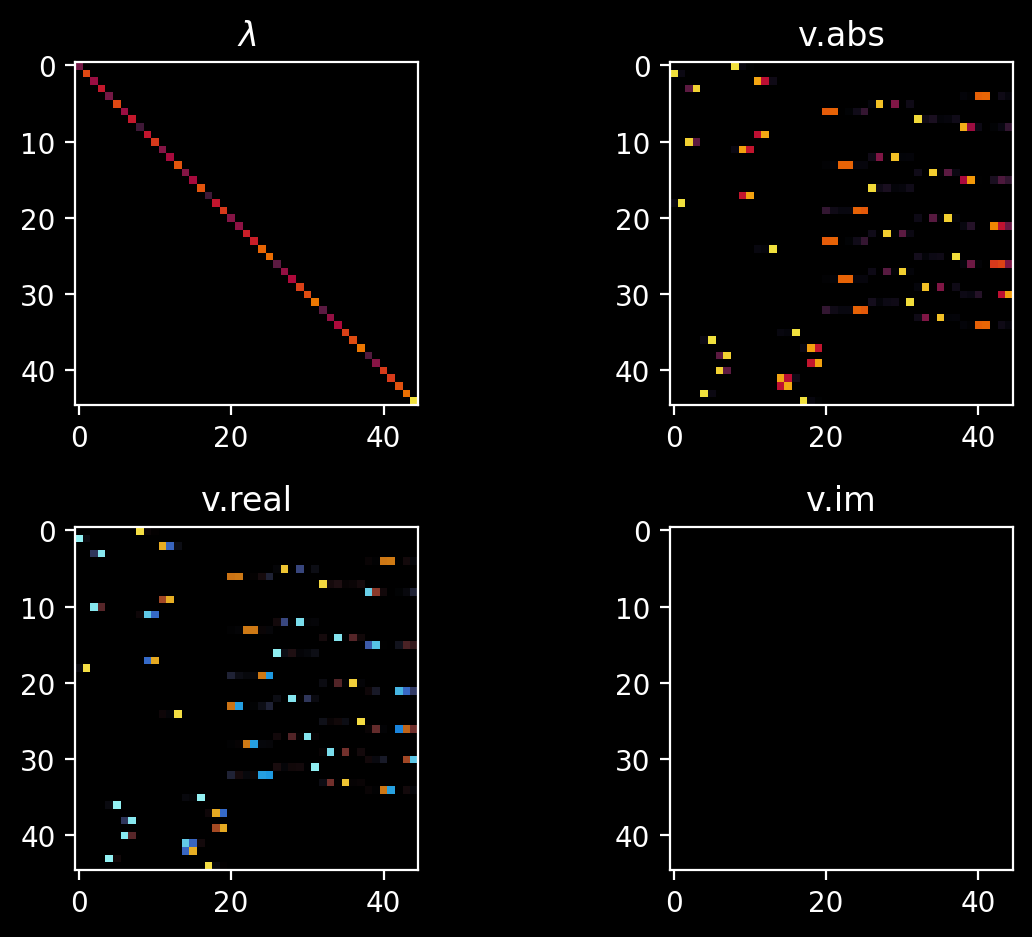

In [453]:
numham = np.array(ham_vS[0].subs(symbols_rep)).astype(np.complex64)
mabs = np.abs(np.matmul(np.linalg.inv(all_eigenvects), np.matmul(numham, all_eigenvects)))
realparts = np.real(all_eigenvects)
imparts = np.imag(all_eigenvects)
maxmax = max(np.max(realparts),np.max(realparts))
minmin = min(np.min(realparts),np.min(realparts))
fig, axes = plt.subplots(nrows= 2, ncols=2)
axes[0,0].imshow(mabs, cmap=cmr.ember)
axes[0,0].set_title('$\\lambda$')
axes[0,1].imshow(np.abs(all_eigenvects), cmap=cmr.ember)
axes[0,1].set_title('v.abs')
axes[1,0].imshow(realparts, cmap=cmr.iceburn)
axes[1,0].set_title('v.real')
axes[1,1].imshow(imparts, vmin=-maxmax, vmax=maxmax, cmap=cmr.iceburn)
axes[1,1].set_title('v.im')
plt.tight_layout()
plt.show()

In [325]:
eigenvects.shape

(7, 7)

In [321]:
all_eigenvects[-1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.15819952,
        0.        ,  0.        ,  0.        ,  0.01995233,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.66204327,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.70710677,  0.        ,  0.        ,  0.        ,
        0.        , -0.00911629,  0.        ,  0.        ,  0.        ,
        0.05269868,  0.        ,  0.        ,  0.        , -0.18279299,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [315]:
for eigenvee in all_eigenvects:
    print(np.linalg.norm(eigenvee))

1.0000000062809051
1.0000000062809051
1.0000000073374542
1.0000000073374542
1.0000000062809051
1.0000000062809051
1.0000000073374542
1.0000000073374542
1.0000000250608374
0.9999999949585089
0.9999999886832565
0.9999999836574623
1.0000000252810046
1.0000000002798763
1.0000000002798763
0.9999999836574623
1.0000000252810046
0.9999999949585089
0.9999999886832563
1.0000000250608374
0.9999999904812554
0.9999999976622028
1.0000000116918957
0.9999999904812554
0.9999999976622028
1.0000000116918957
1.0000000077424265
0.9999999799406709
1.0000000124205106
0.9999999745764543
1.0000000009551129
1.0000000034868668
1.0000000124205106
0.9999999745764543
1.0000000009551129
1.0000000034868668
1.0000000077424265
0.9999999799406709
0.999999998732726
0.999999996801311
0.9999999730923652
0.9999999883524272
0.9999999829741901
0.9999999869148111
0.999999998732726


In [302]:
coeffs, pivots = eigenvect, offsets
np.sum([coeff*fullbasis[pivot] for coeff, pivot in zip(coeffs, pivots)],axis=0)

array([ 0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.15819952+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.01995233+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j, -0.66204327+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j, -0.70710677+0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j, -0.00911629+0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.05269868+0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j, -0.18279299+0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j])

In [293]:
vector_upgrade(eigenvect, offsets, fullbasis)

array([[-0.        +0.j, -0.98310667+0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0.j],
       [-0.        +0.j, -0.        +0.j, -0.        +0.j,
        -0.        +0.j, -0.        +0.j, -0.        +0

In [288]:
coeffs

array([[-0.9831067 +0.j, -0.18303356+0.j],
       [-0.18303356+0.j,  0.9831067 +0.j]], dtype=complex64)

In [284]:
coeffs, pivots = eigenvects, offsets
np.array([coeff*fullbasis[pivot] for coeff, pivot in zip(coeffs, pivots)])

ValueError: operands could not be broadcast together with shapes (2,) (45,) 

In [278]:
fullbasis[2]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [266]:
vector_upgrade(eigenvects, offsets, fullbasis)

TypeError: 'int' object is not iterable

In [229]:
block_eigenvals[0]

(array([-0.03330384,  0.5331408 ], dtype=float32),
 array([[-0.9831067 +0.j, -0.18303356+0.j],
        [-0.18303356+0.j,  0.9831067 +0.j]], dtype=complex64))

In [225]:
np.linalg.eigh(blocks[0])

(array([-0.03330384,  0.5331408 ], dtype=float32),
 array([[-0.9831067 +0.j, -0.18303356+0.j],
        [-0.18303356+0.j,  0.9831067 +0.j]], dtype=complex64))

In [ ]:
np.linalg.eigh()

In [214]:

full_basis = [[KroneckerDelta(i,j) for j in range(45)] for i in range(45)]

In [216]:
list(np.eye(10))

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])]

In [212]:
sp.eye(2).rows

2

In [202]:
%%timeit
list(np.sort(np.linalg.eigvalsh(np.array(ham_vS[0].subs(symbols_rep)).astype(np.complex64))))

47.5 ms ± 5.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [100]:
ham = hamiltonian_CF_CR(2, 'O', 2, True, True)

In [103]:
ham_vS[0] == ham[0]

True

In [99]:
from random import random
randsubs = {sp.Symbol('F^{(0)}'): random(),
            sp.Symbol('F^{(2)}'): random(),
            sp.Symbol('F^{(4)}'): random(),
            sp.Symbol('B_{4,0}'): random()}

In [81]:
np.sort(np.linalg.eigvalsh(np.array(ham_vS[0].subs(randsubs)).astype(np.complex64)))

array([-0.09839837, -0.09839837, -0.09839837, -0.09839837, -0.09839837,
       -0.09839837, -0.09839837, -0.09839837, -0.09839837, -0.09839837,
       -0.09839837, -0.09839837, -0.09839837, -0.09839837, -0.09839837,
        0.02459959,  0.02459959,  0.02459959,  0.02459959,  0.02459959,
        0.02459959,  0.02459959,  0.02459959,  0.02459959,  0.02459959,
        0.02459959,  0.02459959,  0.02459959,  0.02459959,  0.02459959,
        0.02459959,  0.02459959,  0.02459959,  0.02459959,  0.02459959,
        0.02459959,  0.02459959,  0.02459959,  0.02459959,  0.14759755,
        0.14759755,  0.14759755,  0.14759755,  0.14759755,  0.14759755],
      dtype=float32)

In [82]:
np.sort(np.linalg.eigvalsh(np.array(ham[0].subs(randsubs)).astype(np.complex64)))

array([-0.09839837, -0.09839837, -0.09839837, -0.09839837, -0.09839837,
       -0.09839837, -0.09839837, -0.09839837, -0.09839837, -0.09839837,
       -0.09839837, -0.09839837, -0.09839837, -0.09839837, -0.09839837,
        0.02459959,  0.02459959,  0.02459959,  0.02459959,  0.02459959,
        0.02459959,  0.02459959,  0.02459959,  0.02459959,  0.02459959,
        0.02459959,  0.02459959,  0.02459959,  0.02459959,  0.02459959,
        0.02459959,  0.02459959,  0.02459959,  0.02459959,  0.02459959,
        0.02459959,  0.02459959,  0.02459959,  0.02459959,  0.14759755,
        0.14759755,  0.14759755,  0.14759755,  0.14759755,  0.14759755],
      dtype=float32)

In [118]:
ham_vS[0]

Matrix([
[-B_{4,0}/7 + F^{(0)} - 8*F^{(2)}/49 - F^{(4)}/49 - \gamma_S,                                                          0,                                                               0,                                                                 0,                                                   0,                                                   0,                                                  0,                                                   0,                                                   0,                                                             0,                                                                 0,                                                   -5*B_{4,0}/21,                                                   0,                                                     0,                                                     0,                                                     0,                                                   0,        

In [46]:
ham[0][0,0]

-B_{4,0}/7 + F^{(0)} - 8*F^{(2)}/49 - F^{(4)}/49

In [177]:
len(braket_basis_change(double_braket, basis_change).dict)

ahoy 1 {(2, -2): 1} {(2, -2): 1} {(2, -2): 1} {(2, -2): 1}
{(2, -2, 2, -2, 2, -2, 2, -2): 1}
ahoy -1 {(2, -2): 1} {(2, -2): 1} {(2, -2): 1} {(2, -2): 1}
{}


0

In [ ]:
{SpinOrbital(1,1): 1}

{1↑: 1}

In [ ]:
{SpinOrbital(1,1): 1}

{1↑: 1}

In [81]:
cme.as_spinorb_ket()

-|\bar{Y_{2,-2}}Y_{2,-2}Y_{2,-2}\bar{Y_{2,-2}}> + |\bar{Y_{2,-2}}Y_{2,-2}\bar{Y_{2,-2}}Y_{2,-2}>